In [ ]:
import pandas as pd
import plotly.express as px

# Load your cleaned dataset
df = pd.read_csv('AllCitiesMerged1.csv')

# Basic cleaning
df['TotalScore'] = pd.to_numeric(df['TotalScore'], errors='coerce')
df = df.dropna(subset=['lat', 'lon', 'TotalScore', 'City'])

# Create an interactive map
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    color="TotalScore",
    size="TotalScore",
    size_max=15,
    color_continuous_scale=[
        "#5e4fa2", "#3288bd", "#66c2a5", "#abdda4", "#e6f598",
        "#ffffbf", "#fee08b", "#fdae61", "#f46d43", "#d53e4f", "#9e0142"
    ],  # colorful scale
    zoom=2.5,
    height=800,
    mapbox_style="carto-positron",
    hover_name="City",
    hover_data={"TotalScore": True, "lat": False, "lon": False}
)

# Layout tweaks
fig.update_layout(
    title="Accessibility Score Mapping Across Cities",
    margin={"r":0,"t":40,"l":0,"b":0}
)
fig.write_image("Accessibility_Map.png", width=2000, height=1200, scale=3)
# Show the plot
fig.show()


In [ ]:
import pandas as pd
import pydeck as pdk

# Load and clean
df = pd.read_csv('AllCitiesMerged1.csv')
df['TotalScore'] = pd.to_numeric(df['TotalScore'], errors='coerce')
df = df.dropna(subset=['lat', 'lon', 'TotalScore', 'City'])

cities = sorted(df['City'].unique())
print(f"Found {len(cities)} cities.")

# Loop over cities and export HTML
for city in cities:
    city_df = df[df['City'] == city]

    layer = pdk.Layer(
        "ColumnLayer",
        data=city_df,
        get_position='[lon, lat]',
        get_elevation="TotalScore * 1000",  # bar height
        elevation_scale=1,
        radius=100,  # bar width (in meters)
        get_fill_color="[255 - TotalScore*25, TotalScore*25, 100]",
        pickable=True,
        auto_highlight=True,
        extruded=True
    )

    view = pdk.ViewState(
        latitude=city_df['lat'].mean(),
        longitude=city_df['lon'].mean(),
        zoom=10,
        pitch=60,
        bearing=-20
    )

    deck = pdk.Deck(
        layers=[layer],
        initial_view_state=view,
        map_style="carto-positron",
        tooltip={"text": "{Building}\nScore: {TotalScore}"}
    )

    deck.to_html(f"{city}_3D_Accessibility.html", notebook_display=False)
    print(f"✅ Saved 3D map for {city}")


In [ ]:
import pandas as pd
import pydeck as pdk

In [ ]:
df['City'].value_counts()

In [5]:


# Load and clean
df = pd.read_csv('AllCitiesMerged1.csv')
df['TotalScore'] = pd.to_numeric(df['TotalScore'], errors='coerce')
df = df.dropna(subset=['lat', 'lon', 'TotalScore', 'City'])
# Only Jakarta
city = 'SaoPaulo'
city_df = df[df['City'] == city]


# Define beautiful color range
COLOR_RANGE = [
    [34, 167, 181],   # Teal
    [102, 205, 170],  # Medium Aquamarine
    [144, 238, 144],  # Light Green
    [255, 230, 128],  # Light Yellow
    [255, 174, 94],   # Soft Orange
    [250, 110, 106],  # Coral Pink
    [200, 65, 100]    # Rose Red
]

# Create HexagonLayer
layer = pdk.Layer(
    "HexagonLayer",
    data=city_df,
    get_position='[lon, lat]',
    radius=400,          # Bigger hexagons
    elevation_scale=30,
    elevation_range=[0, 1000],
    extruded=True,
    coverage=1,
    pickable=True,
    auto_highlight=True,
    get_elevation_weight="TotalScore",
    elevation_aggregation="MEAN",
    color_range=COLOR_RANGE[::-1]
)

# Set view state
view = pdk.ViewState(
    latitude=city_df['lat'].mean(),
    longitude=city_df['lon'].mean(),
    zoom=10,
    pitch=60,
    bearing=-20
)

# Create deck
deck = pdk.Deck(
    layers=[layer],
    initial_view_state=view,
    map_style="light",
    map_provider="carto",
    tooltip={"text": "Avg Score: {elevationValue:.2f}"}
)

# Save HTML
deck.to_html("SaoPaulo_Grouped3D.html", notebook_display=False)
print("✅ Jakarta Grouped 3D map saved successfully: Jakarta_Grouped3D.html")


✅ Jakarta Grouped 3D map saved successfully: Jakarta_Grouped3D.html


In [5]:
import pandas as pd
import pydeck as pdk

# Load and clean the dataset
df = pd.read_csv('AllCitiesMerged1.csv')
df['TotalScore'] = pd.to_numeric(df['TotalScore'], errors='coerce')
df = df.dropna(subset=['lat', 'lon', 'TotalScore', 'City'])

# Compute average score per city
city_scores = df.groupby('City')['TotalScore'].mean().sort_values()
low_score_cities = city_scores.index[:int(len(city_scores) * 0.95)]

# Filter 80% of data from cities with the lowest average TotalScore
filtered_df = df[df['City'].isin(low_score_cities)]

# Choose a city to visualize (e.g., Jakarta if included)
city = 'Jakarta'
city_df = filtered_df[filtered_df['City'] == city]

# Optional downsampling if the city has a large dataset
if len(city_df) > 10000:
    print(f"Heavy city detected ({city}), downsampling...")
    city_df = city_df.sample(frac=0.1, random_state=42)

# Define color range
COLOR_RANGE = [
    [34, 167, 181],   # Teal
    [102, 205, 170],  # Medium Aquamarine
    [144, 238, 144],  # Light Green
    [255, 230, 128],  # Light Yellow
    [255, 174, 94],   # Soft Orange
    [250, 110, 106],  # Coral Pink
    [200, 65, 100]    # Rose Red
]

# Define HexagonLayer
layer = pdk.Layer(
    "HexagonLayer",
    data=city_df,
    get_position='[lon, lat]',
    radius=150,
    elevation_scale=15,
    elevation_range=[0, 1000],
    extruded=True,
    coverage=1,
    pickable=True,
    auto_highlight=True,
    get_elevation_weight="TotalScore",
    elevation_aggregation="MEAN",
    color_range=COLOR_RANGE[::-1]
)

# Define the initial view
view = pdk.ViewState(
    latitude=city_df['lat'].mean(),
    longitude=city_df['lon'].mean(),
    zoom=10,
    pitch=60,
    bearing=-20
)

# Create the deck object
deck = pdk.Deck(
    layers=[layer],
    initial_view_state=view,
    map_style="light",
    map_provider="carto",
    tooltip={"text": "Avg Score: {elevationValue:.2f}"}
)

# Export to HTML
output_file = f"{city}_Grouped3D_LowScoreCities.html"
deck.to_html(output_file, notebook_display=False)
print(f"✅ {city} 3D hex map saved successfully: {output_file}")


Heavy city detected (Jakarta), downsampling...
✅ Jakarta 3D hex map saved successfully: Jakarta_Grouped3D_LowScoreCities.html


In [2]:


# Load and clean
df = pd.read_csv('AllCitiesMerged1.csv')
df['TotalScore'] = pd.to_numeric(df['TotalScore'], errors='coerce')
df = df.dropna(subset=['lat', 'lon', 'TotalScore', 'City'])

# Only Jakarta
city = 'Jakarta'
city_df = df[df['City'] == city]

# If too heavy, downsample
if len(city_df) > 20000:
    print(f"Heavy city detected ({city}), downsampling...")
    city_df = city_df.sample(frac=0.3, random_state=42)

# Define beautiful color range
COLOR_RANGE = [
    [34, 167, 181],   # Teal
    [102, 205, 170],  # Medium Aquamarine
    [144, 238, 144],  # Light Green
    [255, 230, 128],  # Light Yellow
    [255, 174, 94],   # Soft Orange
    [250, 110, 106],  # Coral Pink
    [200, 65, 100]    # Rose Red
]

# Create HexagonLayer
layer = pdk.Layer(
    "HexagonLayer",
    data=city_df,
    get_position='[lon, lat]',
    radius=150,          # Bigger hexagons
    elevation_scale=20,
    elevation_range=[0, 1000],
    extruded=True,
    coverage=1,
    pickable=True,
    auto_highlight=True,
    get_elevation_weight="TotalScore",
    elevation_aggregation="MEAN",
    color_range=COLOR_RANGE[::-1]
)

# Set view state
view = pdk.ViewState(
    latitude=city_df['lat'].mean(),
    longitude=city_df['lon'].mean(),
    zoom=10,
    pitch=60,
    bearing=-20
)

# Create deck
deck = pdk.Deck(
    layers=[layer],
    initial_view_state=view,
    map_style="light",
    map_provider="carto",
    tooltip={"text": "Avg Score: {elevationValue:.2f}"}
)

# Save HTML
deck.to_html("Jakarta_Grouped3D.html", notebook_display=False)
print("✅ Jakarta Grouped 3D map saved successfully: Jakarta_Grouped3D.html")


✅ Jakarta Grouped 3D map saved successfully: Jakarta_Grouped3D.html


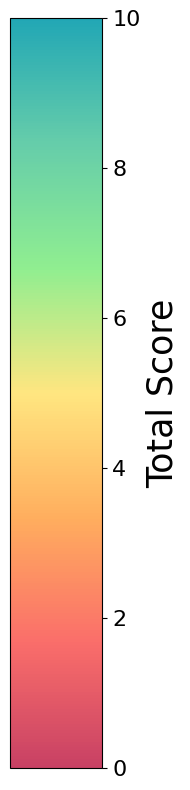

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define your color range
COLOR_RANGE = [
    [34, 167, 181],   # Teal
    [102, 205, 170],  # Medium Aquamarine
    [144, 238, 144],  # Light Green
    [255, 230, 128],  # Light Yellow
    [255, 174, 94],   # Soft Orange
    [250, 110, 106],  # Coral Pink
    [200, 65, 100]    # Rose Red
]

# Normalize colors
COLOR_RANGE = COLOR_RANGE[::-1]
COLOR_RANGE = np.array(COLOR_RANGE) / 255.0

# Create custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom", COLOR_RANGE)

# Create a figure
fig, ax = plt.subplots(figsize=(2, 8))

# Create a colorbar
cb = plt.colorbar(
    plt.cm.ScalarMappable(cmap=custom_cmap),
    cax=ax,
    orientation='vertical'
)

# Label and ticks
cb.set_label('Total Score', fontsize=25)
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_ticklabels(['0', '2', '4', '6', '8', '10'])  # Map 0-1 to 0-10
cb.ax.tick_params(labelsize=16)
# Save the colorbar
plt.tight_layout()
plt.savefig("Jakarta_ColorScale.png", dpi=600, bbox_inches='tight')
plt.show()


In [1]:
import pandas as pd
import pydeck as pdk

# Load and clean
df = pd.read_csv('AllCitiesMerged1.csv')
df['TotalScore'] = pd.to_numeric(df['TotalScore'], errors='coerce')
df = df.dropna(subset=['lat', 'lon', 'TotalScore', 'City'])

cities = sorted(df['City'].unique())
print(f"Found {len(cities)} cities.")

# Define color range
COLOR_RANGE = [
    [34, 167, 181],   # Teal
    [102, 205, 170],  # Medium Aquamarine
    [144, 238, 144],  # Light Green
    [255, 230, 128],  # Light Yellow
    [255, 174, 94],   # Soft Orange
    [250, 110, 106],  # Coral Pink
    [200, 65, 100]    # Rose Red
]

# Loop over cities
for city in cities:
    city_df = df[df['City'] == city]

    # Hexagon layer to group buildings
    layer = pdk.Layer(
        "HexagonLayer",
        data=city_df,
        get_position='[lon, lat]',
        radius=150,  # meters
        elevation_scale=20,
        elevation_range=[0, 1000],
        extruded=True,
        coverage=1,
        pickable=True,
        auto_highlight=True,
        get_elevation_weight="TotalScore",
        elevation_aggregation="MEAN",
        color_range=COLOR_RANGE[::-1]
    )

    view = pdk.ViewState(
        latitude=city_df['lat'].mean(),
        longitude=city_df['lon'].mean(),
        zoom=10,
        pitch=60,
        bearing=-20
    )

    deck = pdk.Deck(
        layers=[layer],
        initial_view_state=view,
        map_style="light",
        map_provider="carto",  # ✅ Ensures basemap loads correctly
        tooltip={"text": "Avg Score: {elevationValue:.2f}"}
    )

    deck.to_html(f"{city}_Grouped3D.html", notebook_display=False)
    print(f"✅ Grouped 3D map saved for: {city}")


Found 13 cities.
✅ Grouped 3D map saved for: Amsterdam
✅ Grouped 3D map saved for: Bangkok
✅ Grouped 3D map saved for: Beijing
✅ Grouped 3D map saved for: Istanbul
✅ Grouped 3D map saved for: Jakarta
✅ Grouped 3D map saved for: Karachi
✅ Grouped 3D map saved for: Lagos
✅ Grouped 3D map saved for: Manila
✅ Grouped 3D map saved for: MexicoCity
✅ Grouped 3D map saved for: SaoPaulo
✅ Grouped 3D map saved for: Seoul
✅ Grouped 3D map saved for: Sydney
✅ Grouped 3D map saved for: Tokyo


In [ ]:
import pydeck as pdk
print(pdk.__version__)


In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from PIL import Image
import time
import os

# All your saved HTMLs
city_files = [f for f in os.listdir() if f.endswith('_Grouped3D.html')]

# Setup Chrome
options = Options()
options.headless = True
options.add_argument("--window-size=2000,1200")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Loop through each file
for html_file in city_files:
    city_name = html_file.replace('_Grouped3D.html', '')

    print(f"Capturing {city_name}...")

    # Open local HTML
    driver.get("file://" + os.path.abspath(html_file))
    time.sleep(5)  # wait for the map to fully load

    # Save full page screenshot
    driver.save_screenshot(f"{city_name}_Grouped3D_RAW.png")

    # Optional: Crop white borders (nice finish)
    img = Image.open(f"{city_name}_Grouped3D_RAW.png")
    img_cropped = img.crop((0, 80, img.width, img.height))  # adjust if needed
    img_cropped.save(f"{city_name}_Grouped3D.png")
    print(f"✅ Saved: {city_name}_Grouped3D.png")

# Close browser
driver.quit()


In [ ]:
import pandas as pd
import pydeck as pdk

# Load and clean
df = pd.read_csv('AllCitiesMerged1.csv')
df['TotalScore'] = pd.to_numeric(df['TotalScore'], errors='coerce')
df = df.dropna(subset=['lat', 'lon', 'TotalScore', 'City'])

cities = sorted(df['City'].unique())
print(f"Found {len(cities)} cities.")

# Define color range
COLOR_RANGE = [
    [34, 167, 181],   # Teal
    [102, 205, 170],  # Medium Aquamarine
    [144, 238, 144],  # Light Green
    [255, 230, 128],  # Light Yellow
    [255, 174, 94],   # Soft Orange
    [250, 110, 106],  # Coral Pink
    [200, 65, 100]    # Rose Red
]

# Loop over cities
for city in cities:
    city_df = df[df['City'] == city]

    # Hexagon layer to group buildings
    layer = pdk.Layer(
        "HexagonLayer",
        data=city_df,
        get_position='[lon, lat]',
        radius=250,  # meters
        elevation_scale=30,
        elevation_range=[0, 1000],
        extruded=True,
        coverage=1,
        pickable=True,
        auto_highlight=True,
        get_elevation_weight="TotalScore",
        elevation_aggregation="MEAN",
        color_range=COLOR_RANGE
    )

    view = pdk.ViewState(
        latitude=city_df['lat'].mean(),
        longitude=city_df['lon'].mean(),
        zoom=10,
        pitch=60,
        bearing=-20
    )

    deck = pdk.Deck(
        layers=[layer],
        initial_view_state=view,
        map_style="light",
        map_provider="carto",  # ✅ Ensures basemap loads correctly
        tooltip={"text": "Avg Score: {elevationValue:.2f}"}
    )

    deck.to_html(f"{city}_Grouped3D.html", notebook_display=False)
    print(f"✅ Grouped 3D map saved for: {city}")


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file
df = pd.read_csv('AverageCityScore1.csv')
df1 = pd.read_csv('AllCitiesMerged1.csv')
# Display the first few rows to understand the structure of the data
df.head()


,City,Civic_Score,Government_Score,Public_Score,School_Score,Sports_Score,Transport_Score,TotalScore,Fire_Score,Hospital_Score,Toilet_Score,Supermarket_Score
0,Amsterdam,7.90,9.08,8.09,9.27,8.56,8.64,6.43,2.26,9.53,0.04,0.96
1,Bangkok,2.88,7.17,4.02,6.84,4.00,6.74,5.28,NaN,NaN,NaN,NaN
2,Beijing,1.80,7.85,4.35,7.52,5.14,7.91,4.98,1.14,9.08,0.02,NaN
3,Istanbul,7.16,5.96,7.91,7.60,7.05,8.42,7.03,5.04,8.77,6.31,6.11
4,Jakarta,4.45,5.79,6.76,8.93,7.20,7.99,6.35,7.20,7.85,0.01,7.30


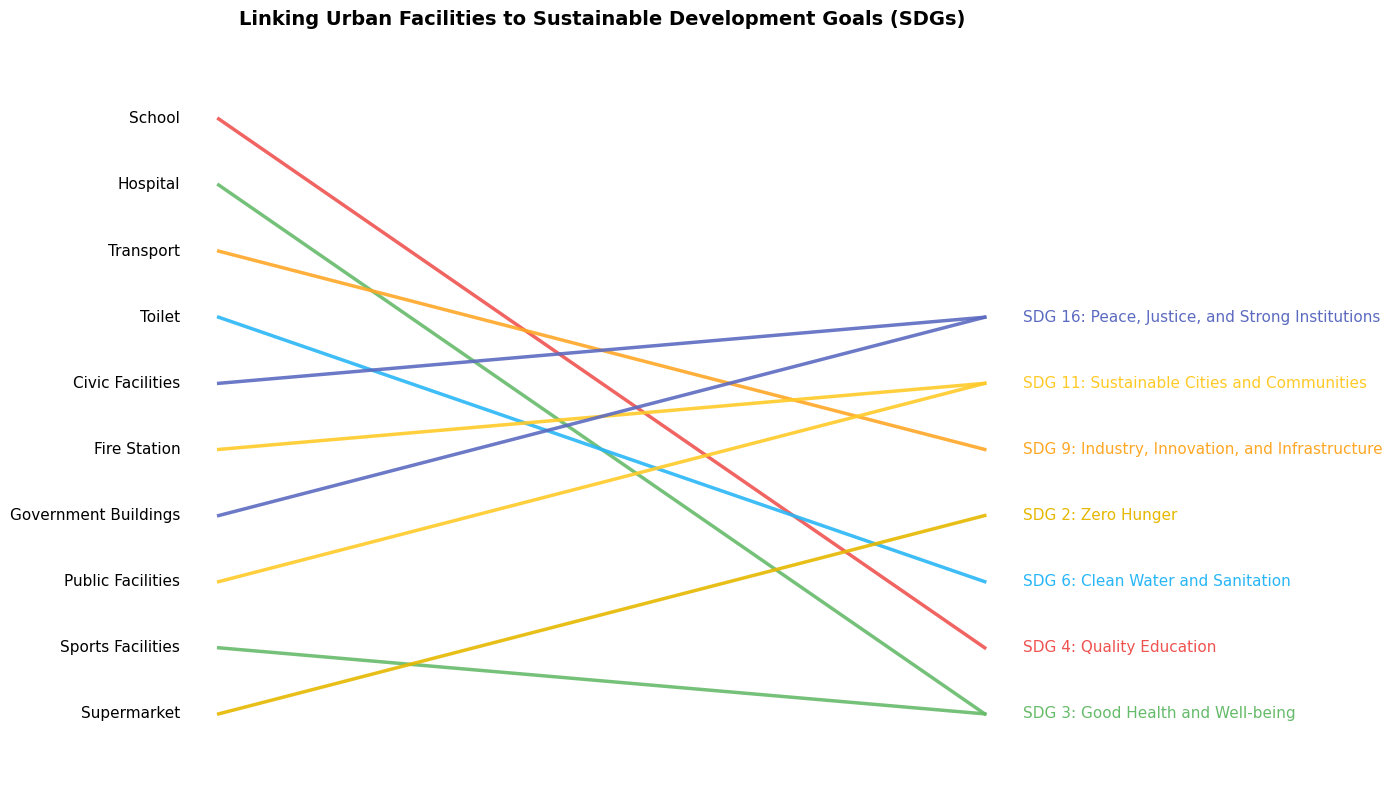

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.sankey import Sankey

# Define the data
facility_to_sdg = {
    'School': ('SDG 4: Quality Education', '4.1.1'),
    'Hospital': ('SDG 3: Good Health and Well-being', '3.8.1'),
    'Transport': ('SDG 9: Industry, Innovation, and Infrastructure', '9.1.1'),
    'Toilet': ('SDG 6: Clean Water and Sanitation', '6.2.1'),
    'Civic Facilities': ('SDG 16: Peace, Justice, and Strong Institutions', '16.6.2'),
    'Fire Station': ('SDG 11: Sustainable Cities and Communities', '11.5.1'),
    'Government Buildings': ('SDG 16: Peace, Justice, and Strong Institutions', '16.6.2'),
    'Public Facilities': ('SDG 11: Sustainable Cities and Communities', '11.7.1'),
    'Sports Facilities': ('SDG 3: Good Health and Well-being', '3.4.1'),
    'Supermarket': ('SDG 2: Zero Hunger', '2.1.2'),
}

# Assign colors for SDGs (Muted, academic tone)
sdg_colors = {
    'SDG 2: Zero Hunger': '#e6b800',
    'SDG 3: Good Health and Well-being': '#66bb6a',
    'SDG 4: Quality Education': '#ef5350',
    'SDG 6: Clean Water and Sanitation': '#29b6f6',
    'SDG 9: Industry, Innovation, and Infrastructure': '#ffa726',
    'SDG 11: Sustainable Cities and Communities': '#ffca28',
    'SDG 16: Peace, Justice, and Strong Institutions': '#5c6bc0',
}

# Prepare the figure
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('white')

# Create Sankey manually
facilities = list(facility_to_sdg.keys())
sdgs = list(set([v[0] for v in facility_to_sdg.values()]))

# Map facility to indexes
facility_idx = {f: i for i, f in enumerate(facilities)}
sdg_idx = {s: i+len(facilities) for i, s in enumerate(sdgs)}

# Create the Sankey links
flows = []
labels = []
colors = []

for f, (sdg, _) in facility_to_sdg.items():
    flows.append(1)  # equal weight for clean visualization
    labels.append(f"{f} ➔ {sdg.split(':')[0]}")
    colors.append(sdg_colors[sdg])

# Draw the Sankey manually using bars and arrows
y_pos_facility = list(range(len(facilities)))[::-1]
y_pos_sdg = list(range(len(sdgs)))

for i, (f, (sdg, indicator)) in enumerate(facility_to_sdg.items()):
    # Facility position
    f_idx = y_pos_facility[facility_idx[f]]
    s_idx = y_pos_sdg[sdgs.index(sdg)]

    # Draw a line
    ax.plot([0, 1], [f_idx, s_idx], color=sdg_colors[sdg], linewidth=2.5, alpha=0.9)

# Plot facility labels
for f in facilities:
    idx = y_pos_facility[facility_idx[f]]
    ax.text(-0.05, idx, f, va='center', ha='right', fontsize=11, fontweight='medium')

# Plot SDG labels
for s in sdgs:
    idx = y_pos_sdg[sdgs.index(s)]
    ax.text(1.05, idx, s, va='center', ha='left', fontsize=11, fontweight='medium', color=sdg_colors[s])

# Clean aesthetics
ax.axis('off')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-1, max(len(facilities), len(sdgs)))

plt.title('Linking Urban Facilities to Sustainable Development Goals (SDGs)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


C:\Users\Apoorva\AppData\Local\Temp\ipykernel_27816\645079711.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['City'], rotation=45, ha='right')


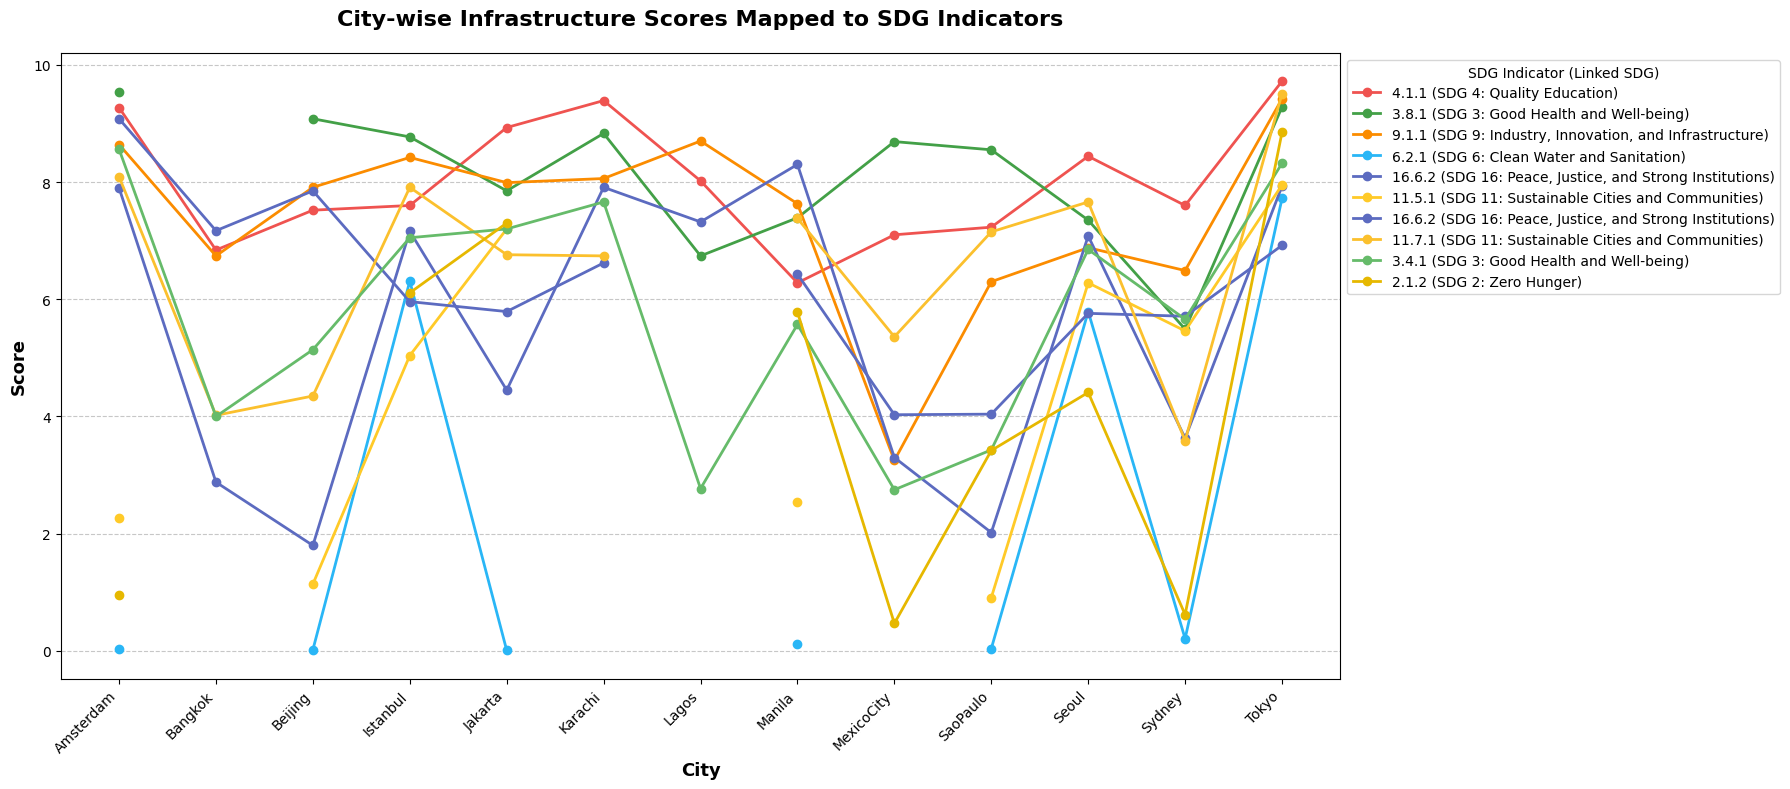

In [3]:
# Map facility columns to SDG Indicators
facility_to_indicator = {
    'School_Score': ('4.1.1', 'SDG 4: Quality Education'),
    'Hospital_Score': ('3.8.1', 'SDG 3: Good Health and Well-being'),
    'Transport_Score': ('9.1.1', 'SDG 9: Industry, Innovation, and Infrastructure'),
    'Toilet_Score': ('6.2.1', 'SDG 6: Clean Water and Sanitation'),
    'Civic_Score': ('16.6.2', 'SDG 16: Peace, Justice, and Strong Institutions'),
    'Fire_Score': ('11.5.1', 'SDG 11: Sustainable Cities and Communities'),
    'Government_Score': ('16.6.2', 'SDG 16: Peace, Justice, and Strong Institutions'),
    'Public_Score': ('11.7.1', 'SDG 11: Sustainable Cities and Communities'),
    'Sports_Score': ('3.4.1', 'SDG 3: Good Health and Well-being'),
    'Supermarket_Score': ('2.1.2', 'SDG 2: Zero Hunger'),
}

# Create a figure
fig, ax = plt.subplots(figsize=(18, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Professional SDG colors
indicator_colors = {
    '2.1.2': '#e6b800',
    '3.4.1': '#66bb6a',
    '3.8.1': '#43a047',
    '4.1.1': '#ef5350',
    '6.2.1': '#29b6f6',
    '9.1.1': '#fb8c00',
    '11.5.1': '#ffca28',
    '11.7.1': '#fbc02d',
    '16.6.2': '#5c6bc0',
}

# Plot each indicator
for col, (indicator, sdg_name) in facility_to_indicator.items():
    ax.plot(df['City'], df[col], marker='o', label=f"{indicator} ({sdg_name})", color=indicator_colors[indicator], linewidth=2)

# Formatting
ax.set_xlabel('City', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('City-wise Infrastructure Scores Mapped to SDG Indicators', fontsize=16, fontweight='bold', pad=20)
ax.legend(title='SDG Indicator (Linked SDG)', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
ax.set_xticklabels(df['City'], rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


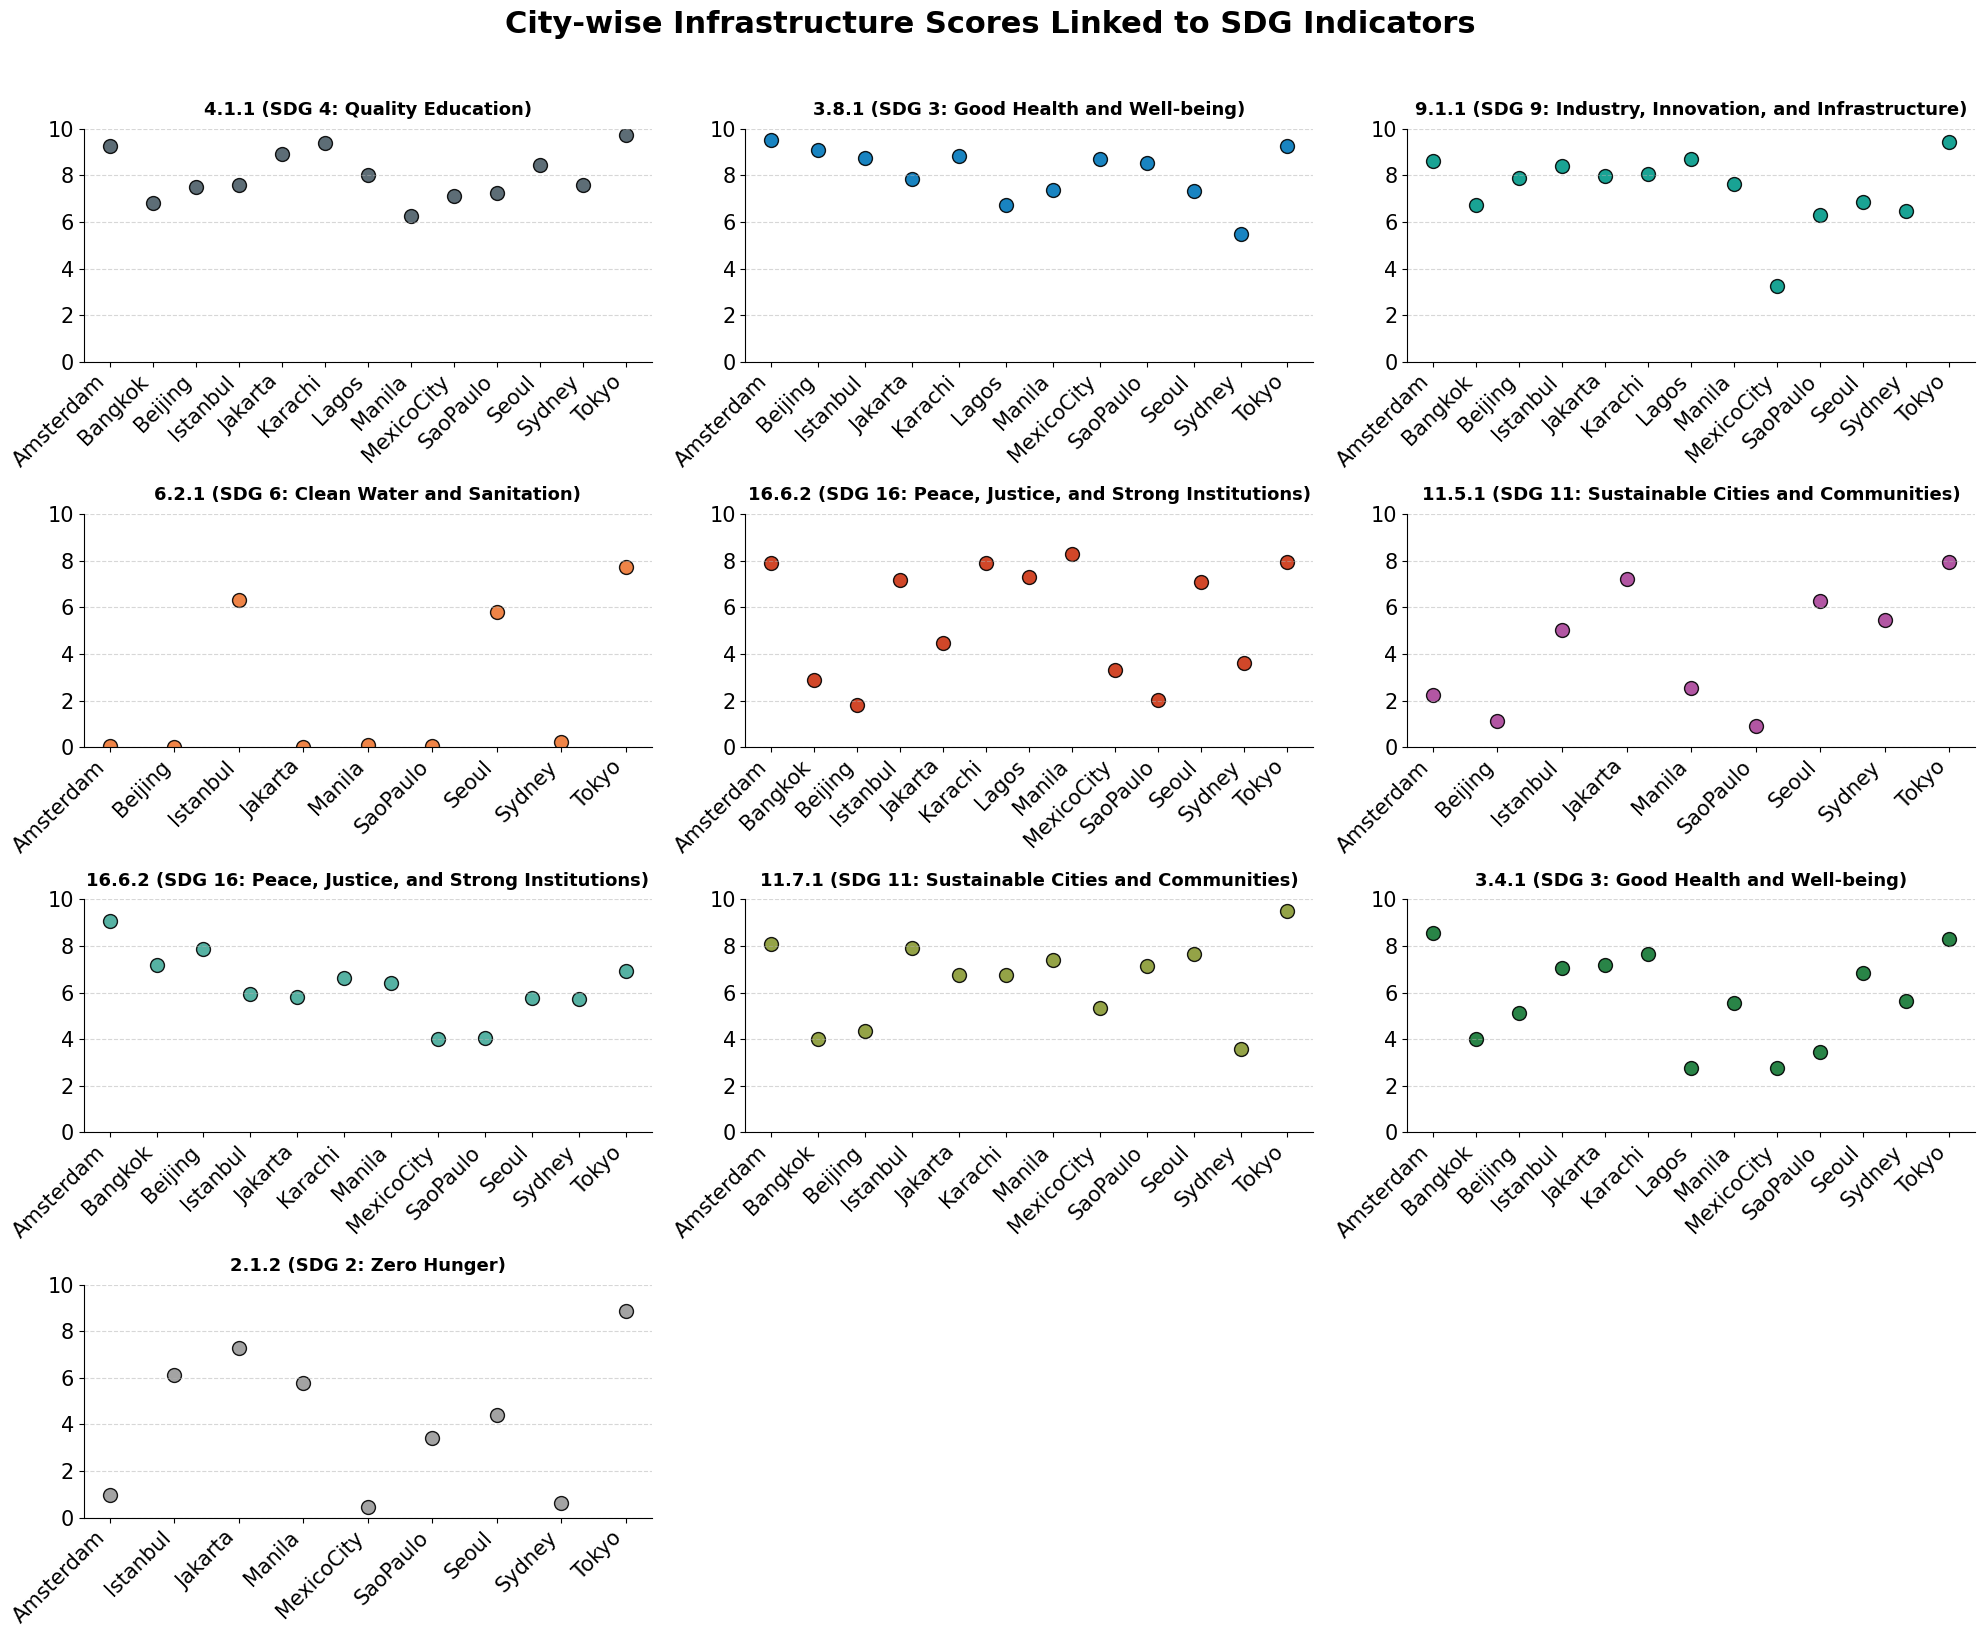

In [4]:
import matplotlib.pyplot as plt

# Re-declare everything needed
indicator_cols = list(facility_to_indicator.keys())

# New beautiful, publication-grade color palette
new_palette = [
    '#4B5D67', '#0077BB', '#009988', '#EE7733', '#CC3311',
    '#AA4499', '#44AA99', '#889933', '#117733', '#999999'
]

# Create the figure and grid layout
fig, axs = plt.subplots(4, 3, figsize=(20, 16))
fig.patch.set_facecolor('white')
axs = axs.flatten()

# Plot each SDG indicator subplot
for idx, col in enumerate(indicator_cols):
    indicator, sdg_name = facility_to_indicator[col]
    ax = axs[idx]

    # Drop rows where the current score is NaN
    df_filtered = df[['City', col]].dropna()

    # Plot scatter (dots only)
    ax.scatter(
        x=df_filtered['City'],
        y=df_filtered[col],
        color=new_palette[idx % len(new_palette)],
        s=100,  # size of dots
        edgecolor='black',
        alpha=0.9
    )

    # Aesthetics
    ax.set_title(f"{indicator} ({sdg_name})", fontsize=13, fontweight='bold', pad=10)
    ax.set_xticks(range(len(df_filtered['City'])))
    ax.set_xticklabels(df_filtered['City'], rotation=45, ha='right', fontsize=15)
    ax.set_ylim(0, 10)
    ax.set_yticks([0, 2, 4, 6, 8, 10])
    ax.tick_params(axis='y', labelsize=15)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove any unused subplot axes
for j in range(len(indicator_cols), len(axs)):
    fig.delaxes(axs[j])

# Add super title
fig.suptitle('City-wise Infrastructure Scores Linked to SDG Indicators',
             fontsize=22, fontweight='bold', y=1.02)

plt.tight_layout()

# Save the figure as high-res PNG (1000 dpi)
#fig.savefig('000SDGCity_SDGScores_FigureRevised.png', dpi=1500, bbox_inches='tight')


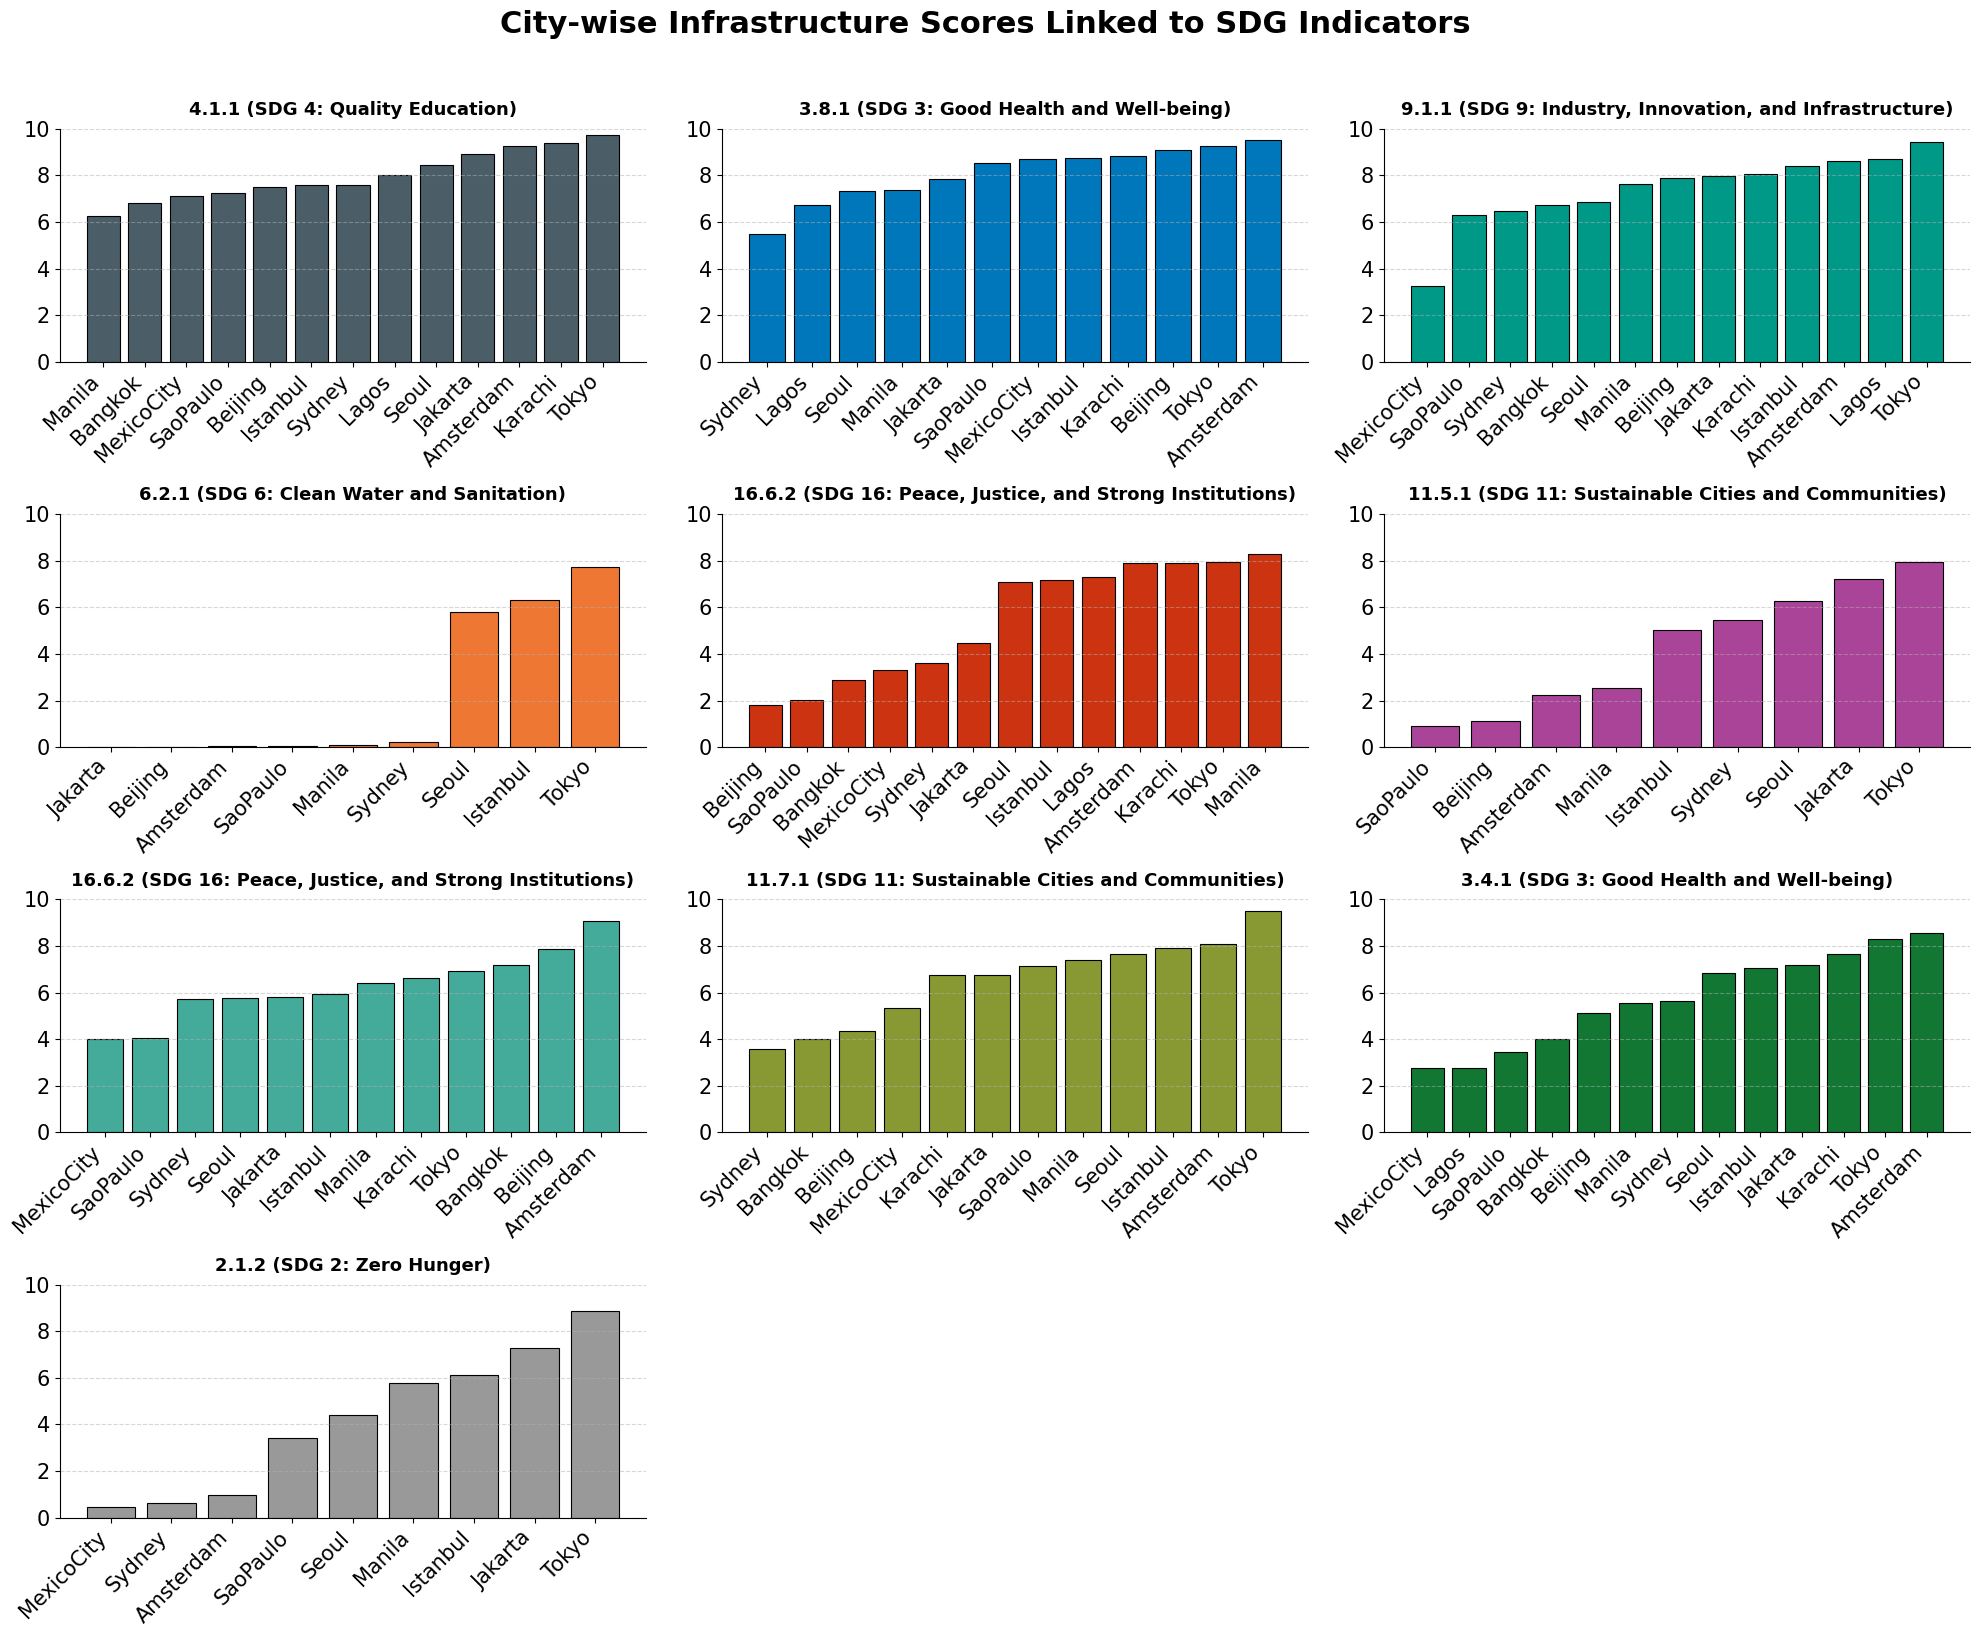

In [5]:
import matplotlib.pyplot as plt

# Define your mapping dictionary (example structure)
# facility_to_indicator = {
#     'School_Score': ('Access to Education', 'SDG 4'),
#     'Hospital_Score': ('Access to Health Services', 'SDG 3'),
#     ...
# }

# Re-declare everything needed
indicator_cols = list(facility_to_indicator.keys())

# New beautiful, publication-grade color palette
new_palette = [
    '#4B5D67', '#0077BB', '#009988', '#EE7733', '#CC3311',
    '#AA4499', '#44AA99', '#889933', '#117733', '#999999'
]

# Create the figure and grid layout
fig, axs = plt.subplots(4, 3, figsize=(20, 16))
fig.patch.set_facecolor('white')
axs = axs.flatten()

# Plot each SDG indicator subplot
for idx, col in enumerate(indicator_cols):
    indicator, sdg_name = facility_to_indicator[col]
    ax = axs[idx]

    # Drop NaNs and sort by the score column in ascending order
    df_filtered = df[['City', col]].dropna().sort_values(by=col)

    # Bar plot
    ax.bar(
        x=df_filtered['City'],
        height=df_filtered[col],
        color=new_palette[idx % len(new_palette)],
        edgecolor='black',
        linewidth=0.8
    )

    # Aesthetics
    ax.set_title(f"{indicator} ({sdg_name})", fontsize=13, fontweight='bold', pad=10)
    ax.set_xticks(range(len(df_filtered['City'])))
    ax.set_xticklabels(df_filtered['City'], rotation=45, ha='right', fontsize=15)
    ax.set_ylim(0, 10)
    ax.set_yticks([0, 2, 4, 6, 8, 10])
    ax.tick_params(axis='y', labelsize=15)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove any unused subplot axes
for j in range(len(indicator_cols), len(axs)):
    fig.delaxes(axs[j])

# Add super title
fig.suptitle('City-wise Infrastructure Scores Linked to SDG Indicators',
             fontsize=22, fontweight='bold', y=1.02)

plt.tight_layout()

# Save the figure as high-res PNG (1000 dpi)
#fig.savefig('000SDGCity_SDGScores_BarPlot1.png', dpi=1500, bbox_inches='tight')


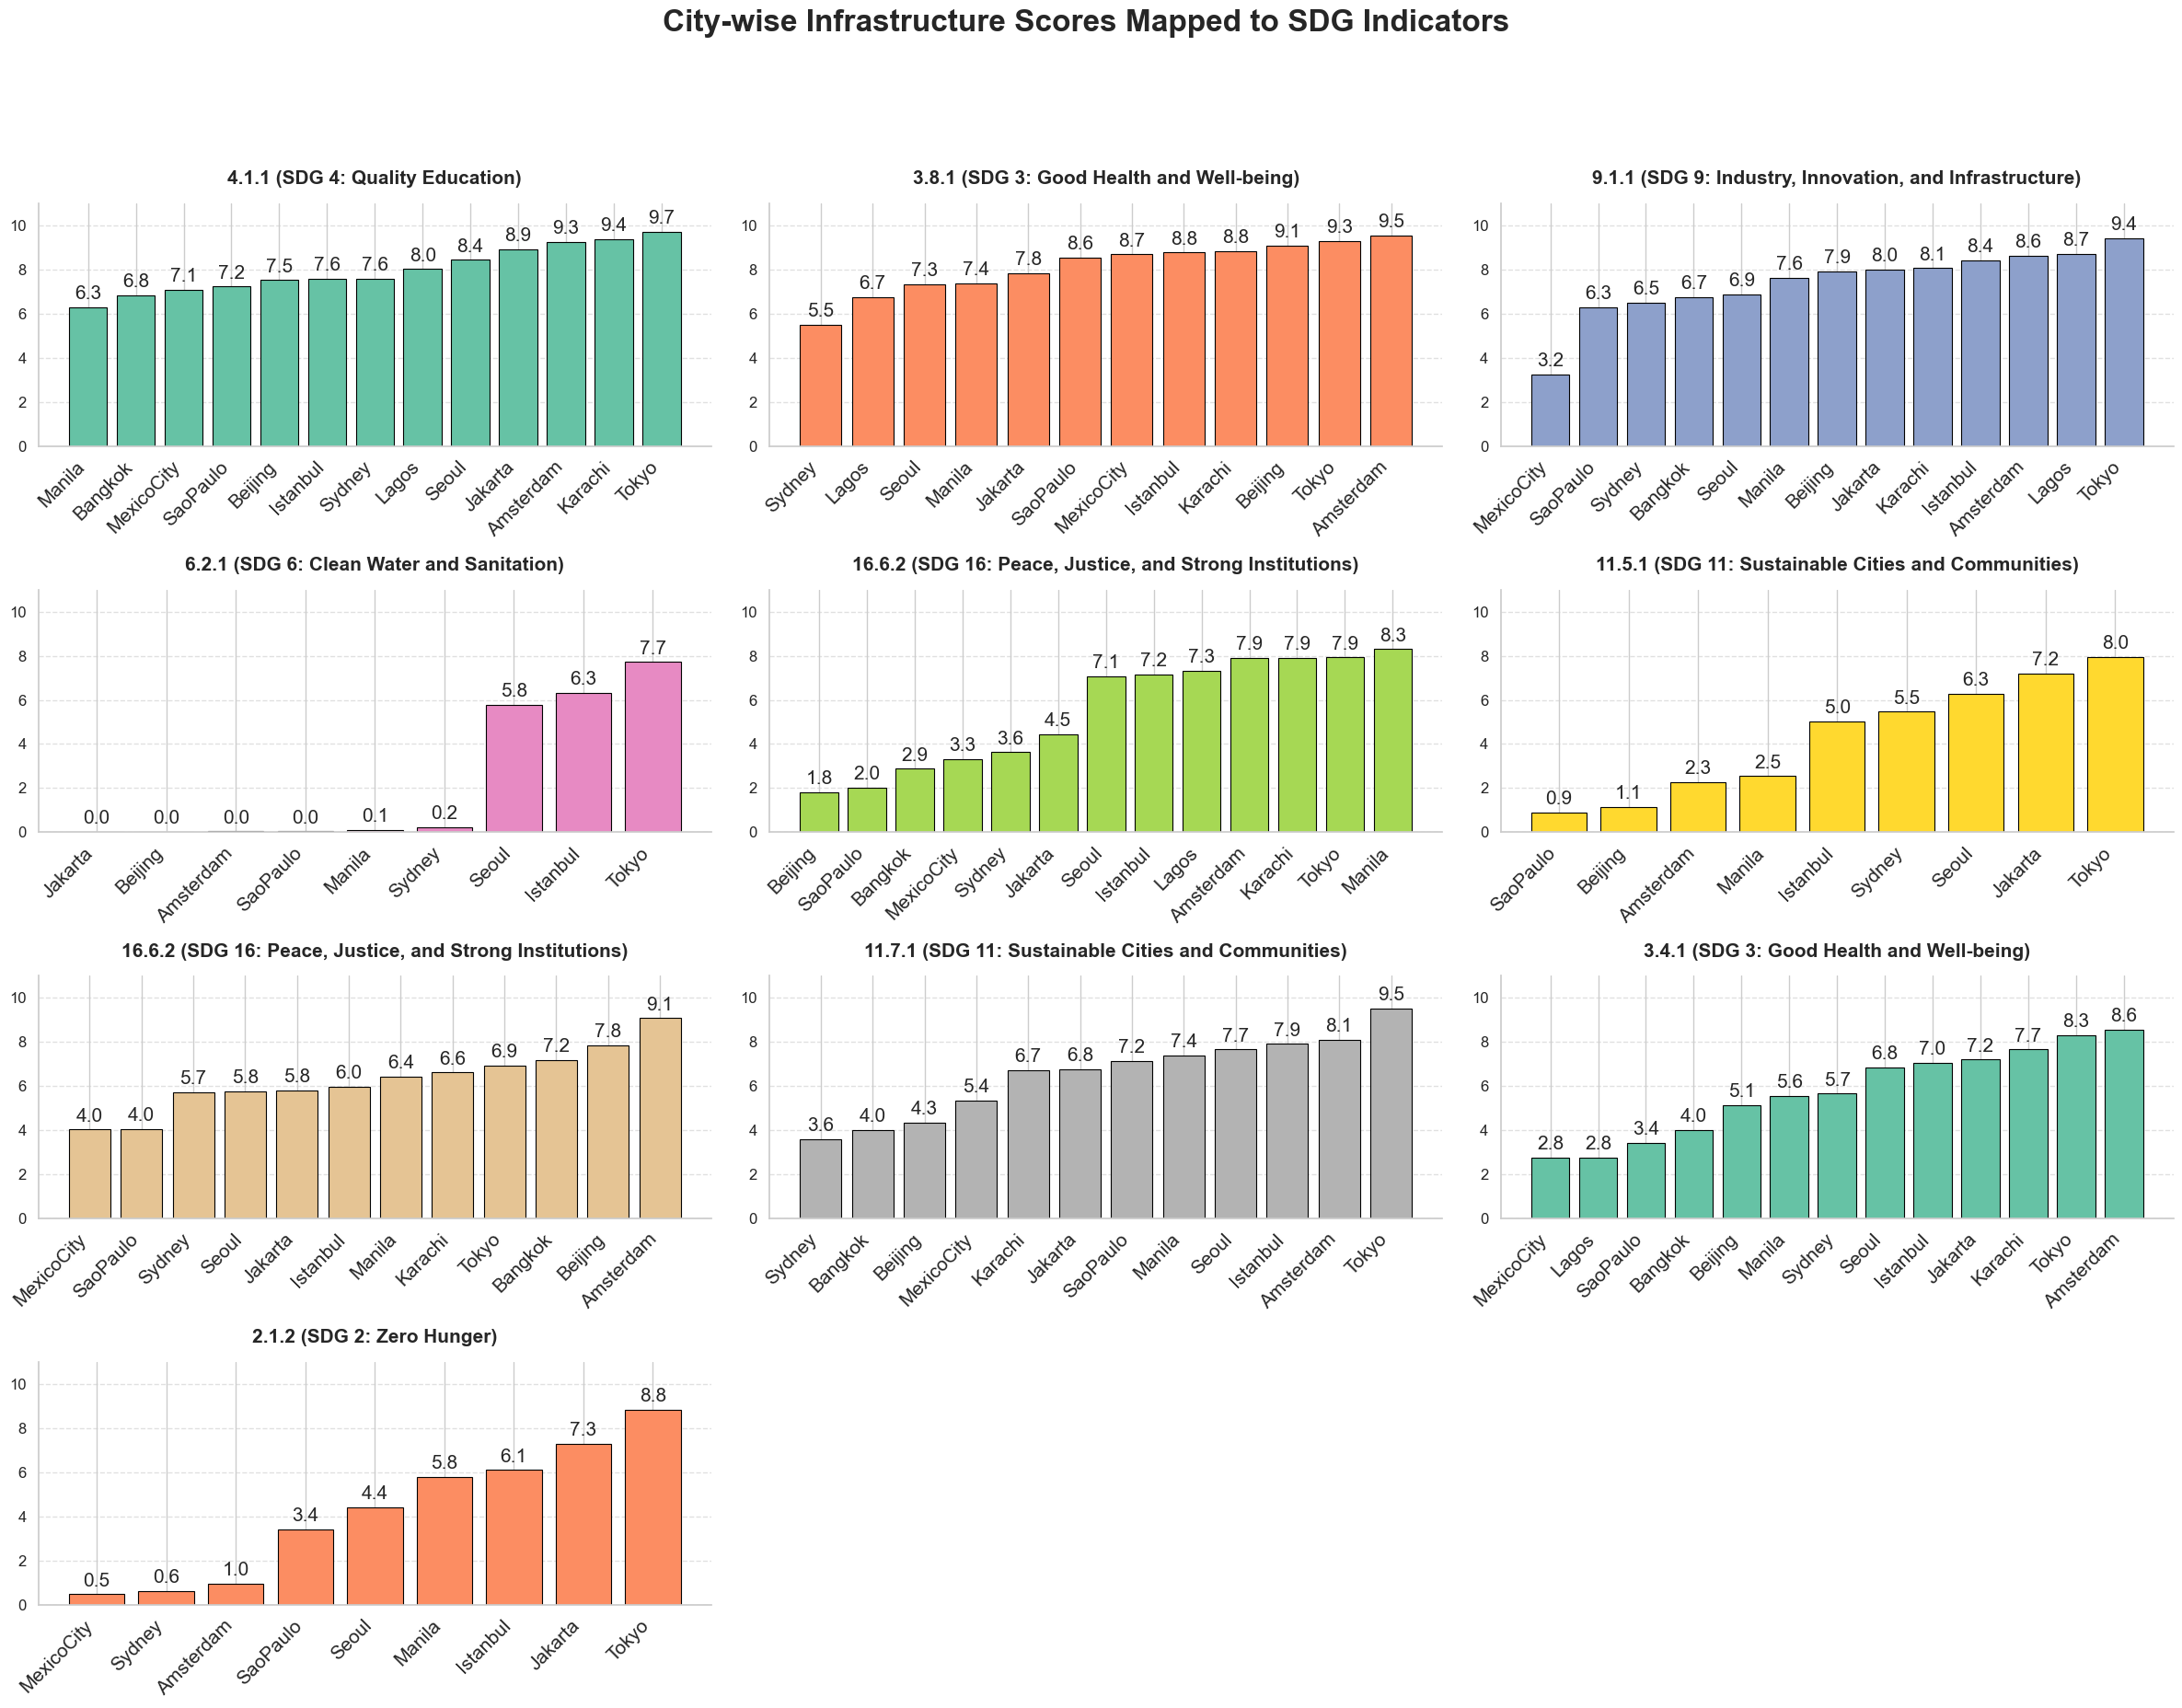

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Set seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Re-declare everything needed
indicator_cols = list(facility_to_indicator.keys())

# Refined color palette (modern pastel shades)
new_palette = sns.color_palette("Set2", n_colors=len(indicator_cols))

# Create the figure and grid layout
fig, axs = plt.subplots(4, 3, figsize=(24, 18))
fig.patch.set_facecolor('white')
axs = axs.flatten()

# Plot each SDG indicator subplot
for idx, col in enumerate(indicator_cols):
    indicator, sdg_name = facility_to_indicator[col]
    ax = axs[idx]

    # Drop NaNs and sort
    df_filtered = df[['City', col]].dropna().sort_values(by=col)

    # Bar plot
    bars = ax.bar(
        x=df_filtered['City'],
        height=df_filtered[col],
        color=new_palette[idx % len(new_palette)],
        edgecolor='black',
        linewidth=0.8
    )

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.2,
            f"{height:.1f}",
            ha='center',
            va='bottom',
            fontsize=15,
            fontweight='medium'
        )

    # Aesthetics
    ax.set_title(f"{indicator} ({sdg_name})", fontsize=15, fontweight='bold', pad=15)
    ax.set_xticks(range(len(df_filtered['City'])))
    ax.set_xticklabels(df_filtered['City'], rotation=45, ha='right', fontsize=15)
    ax.set_ylim(0, 11)
    ax.set_yticks([0, 2, 4, 6, 8, 10])
    ax.tick_params(axis='y', labelsize=12)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove unused subplots
for j in range(len(indicator_cols), len(axs)):
    fig.delaxes(axs[j])

# Add super title
fig.suptitle(
    'City-wise Infrastructure Scores Mapped to SDG Indicators',
    fontsize=24, fontweight='bold', y=1.03
)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for the title

# Save high-res image
#fig.savefig('000SDGCity_SDGScores_Enhanced.png', dpi=1100, bbox_inches='tight')


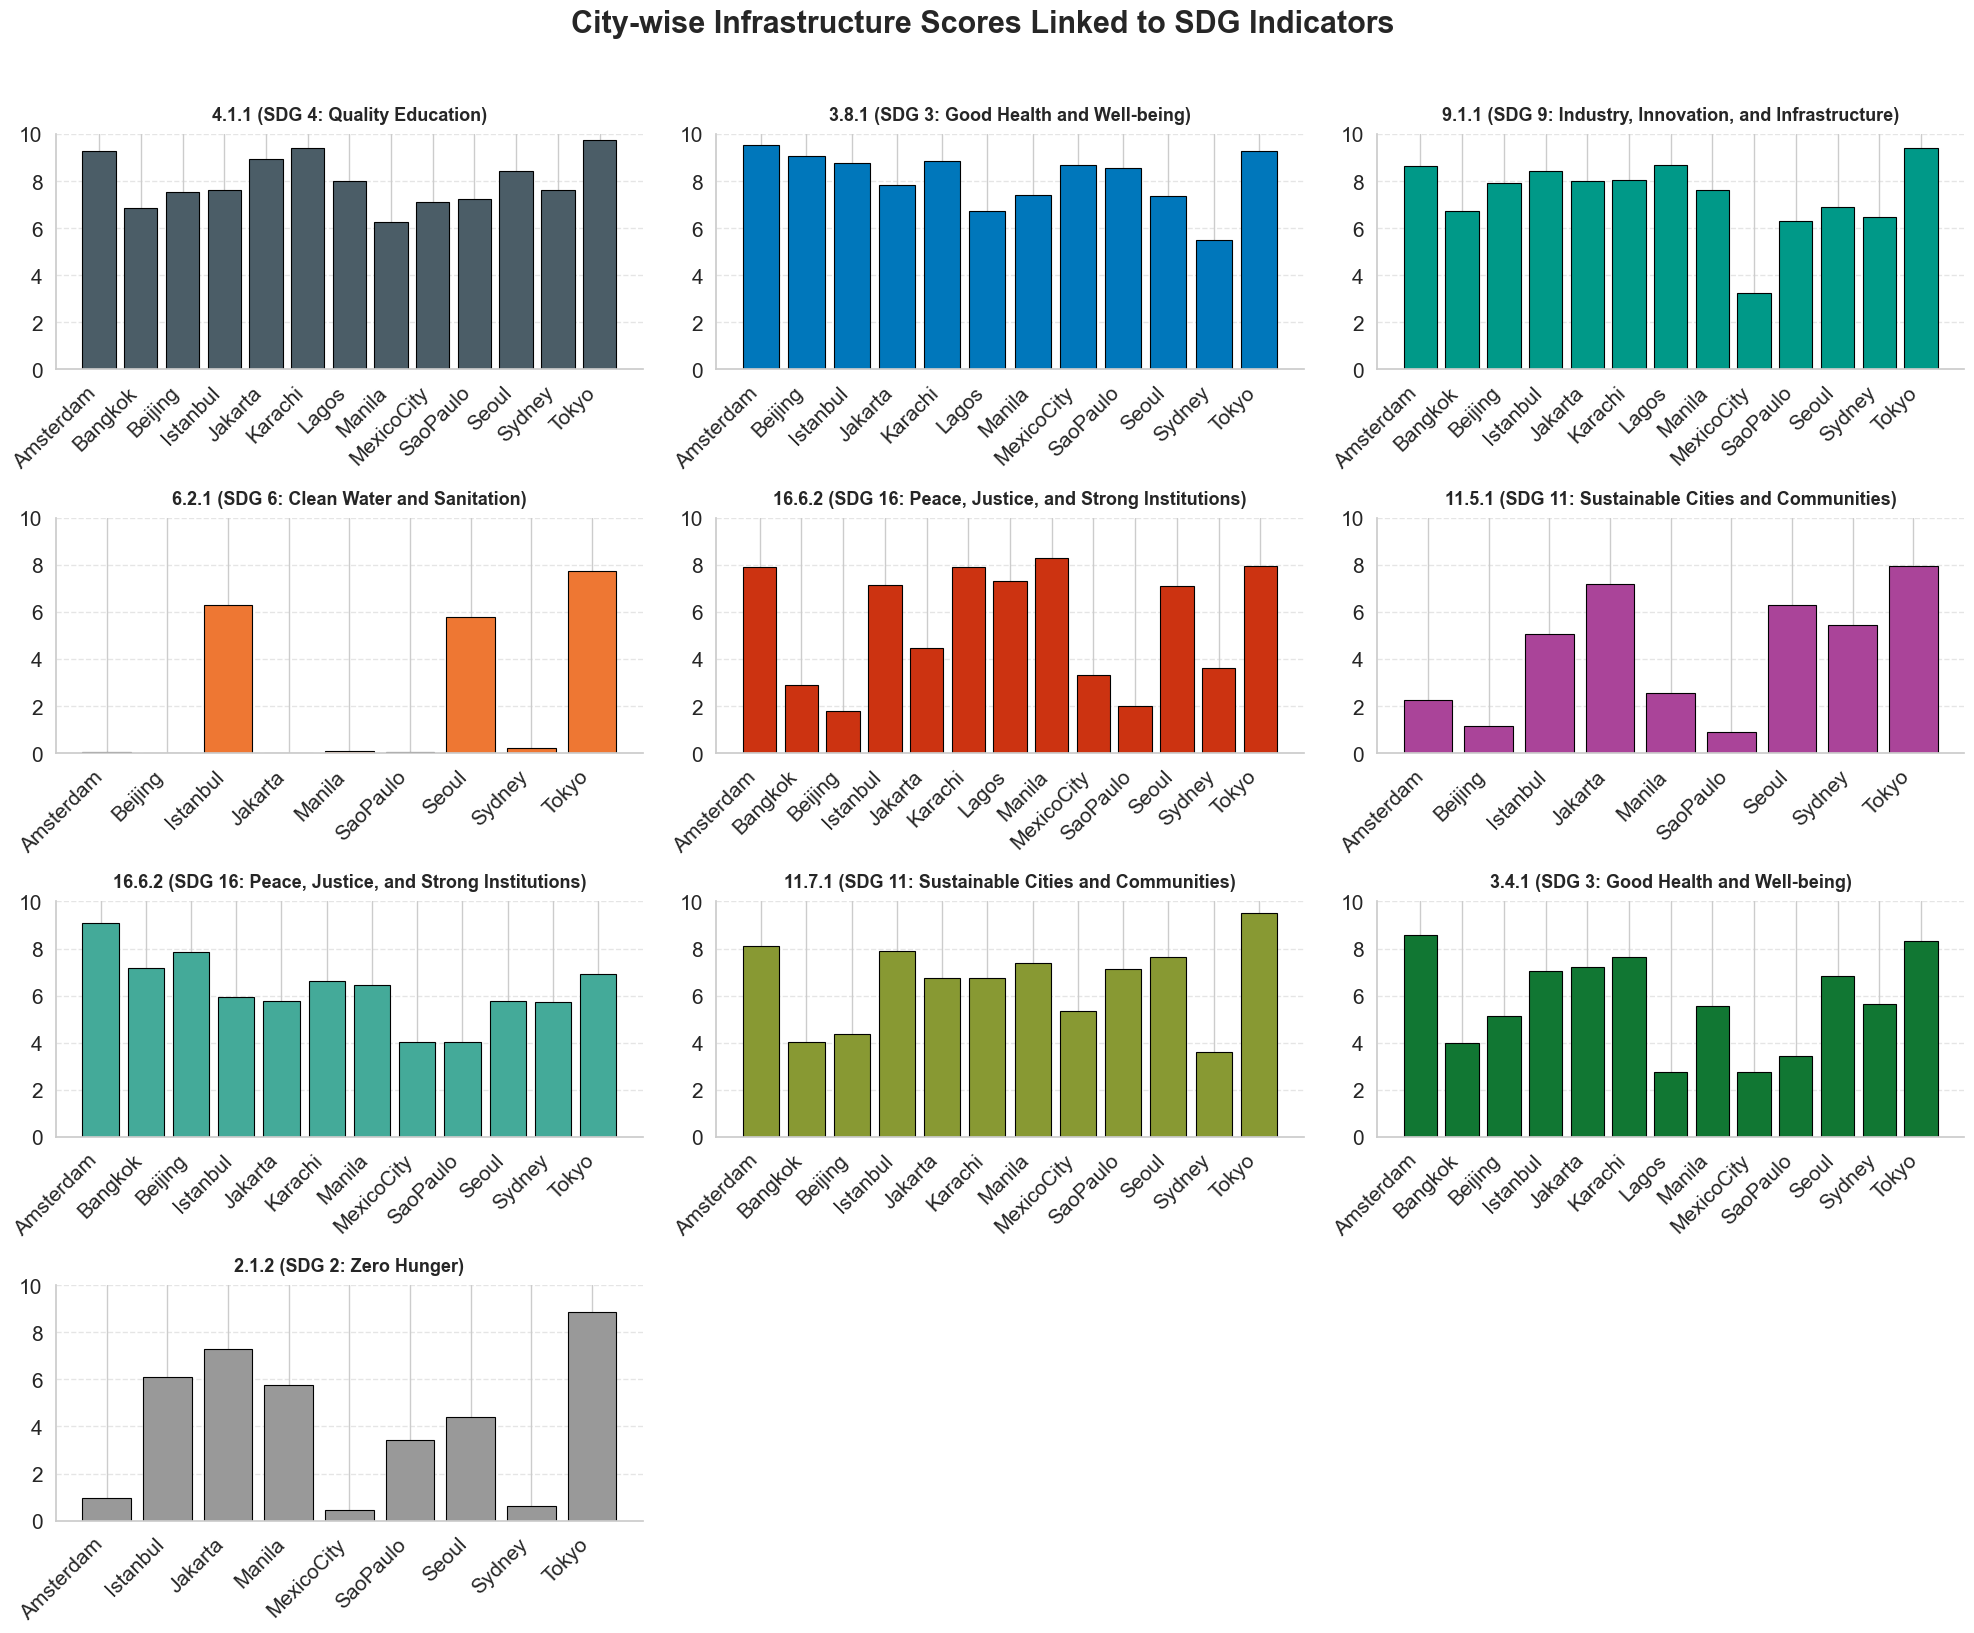

In [7]:
import matplotlib.pyplot as plt

# Re-declare everything needed
indicator_cols = list(facility_to_indicator.keys())

# New beautiful, publication-grade color palette
new_palette = [
    '#4B5D67', '#0077BB', '#009988', '#EE7733', '#CC3311',
    '#AA4499', '#44AA99', '#889933', '#117733', '#999999'
]

# Create the figure and grid layout
fig, axs = plt.subplots(4, 3, figsize=(20, 16))
fig.patch.set_facecolor('white')
axs = axs.flatten()

# Plot each SDG indicator subplot
for idx, col in enumerate(indicator_cols):
    indicator, sdg_name = facility_to_indicator[col]
    ax = axs[idx]

    # Drop rows where the current score is NaN
    df_filtered = df[['City', col]].dropna()

    # Bar plot
    ax.bar(
        x=df_filtered['City'],
        height=df_filtered[col],
        color=new_palette[idx % len(new_palette)],
        edgecolor='black',
        linewidth=0.8
    )

    # Aesthetics
    ax.set_title(f"{indicator} ({sdg_name})", fontsize=13, fontweight='bold', pad=10)
    ax.set_xticks(range(len(df_filtered['City'])))
    ax.set_xticklabels(df_filtered['City'], rotation=45, ha='right', fontsize=15)
    ax.set_ylim(0, 10)
    ax.set_yticks([0, 2, 4, 6, 8, 10])
    ax.tick_params(axis='y', labelsize=15)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove any unused subplot axes
for j in range(len(indicator_cols), len(axs)):
    fig.delaxes(axs[j])

# Add super title
fig.suptitle('City-wise Infrastructure Scores Linked to SDG Indicators',
             fontsize=22, fontweight='bold', y=1.02)

plt.tight_layout()

# Save the figure as high-res PNG (1000 dpi)
#fig.savefig('000SDGCity_SDGScores_BarPlot.png', dpi=1500, bbox_inches='tight')


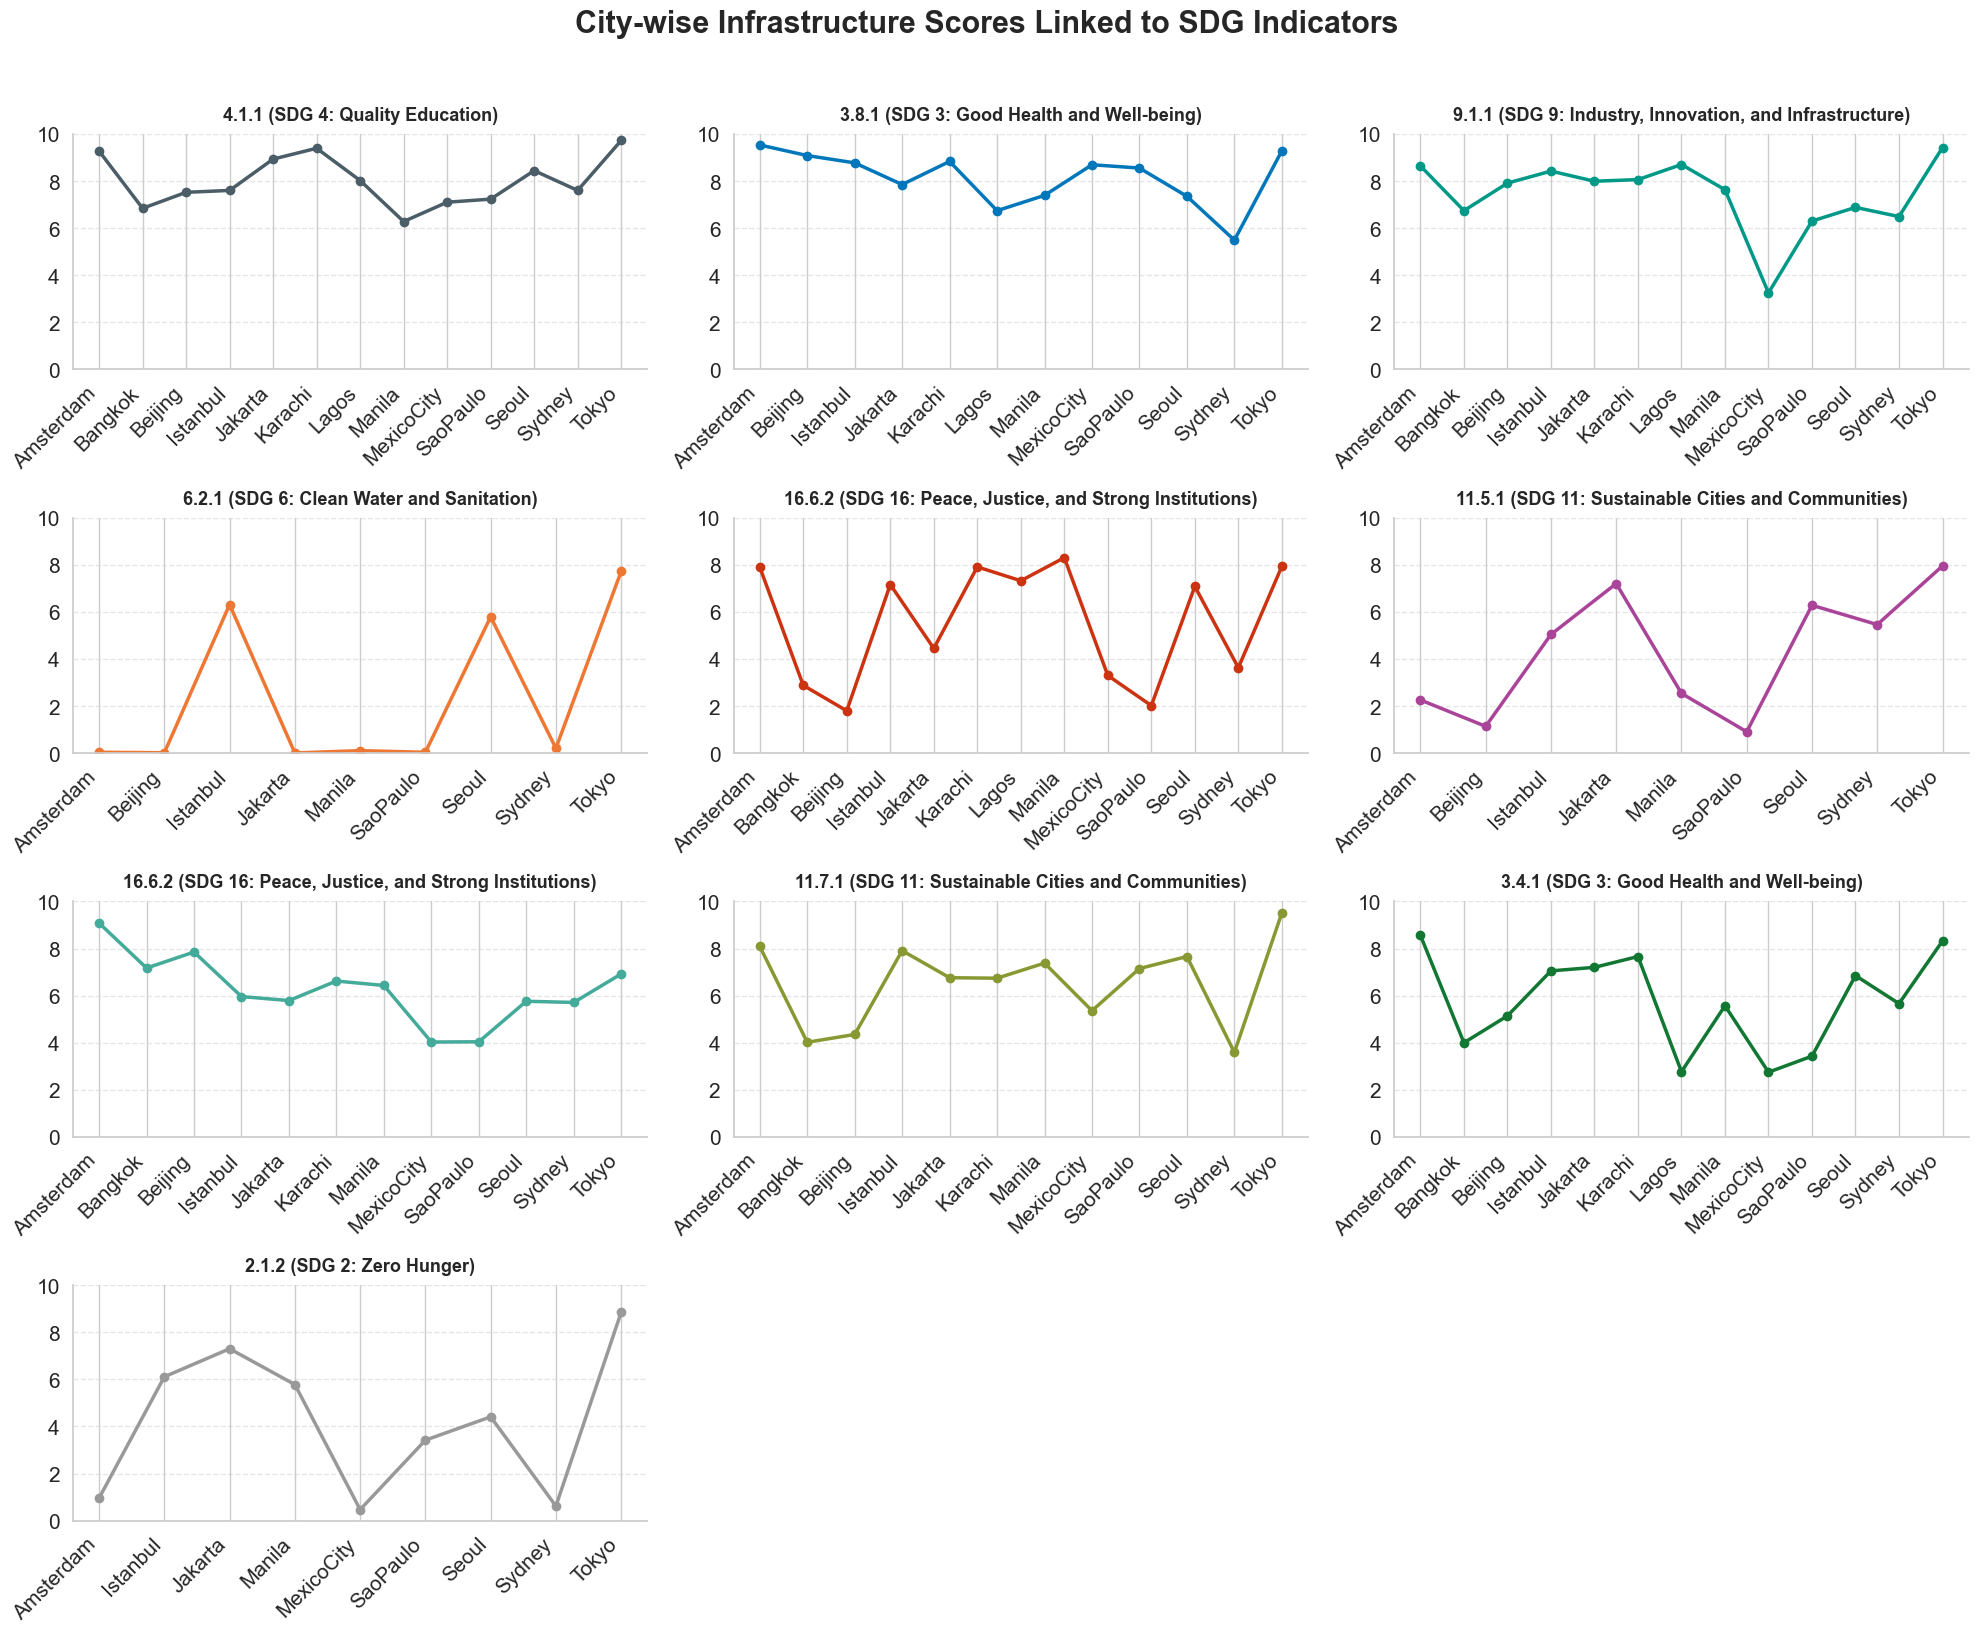

In [8]:
import matplotlib.pyplot as plt

# Re-declare everything needed
indicator_cols = list(facility_to_indicator.keys())

# New beautiful, publication-grade color palette
new_palette = [
    '#4B5D67', '#0077BB', '#009988', '#EE7733', '#CC3311',
    '#AA4499', '#44AA99', '#889933', '#117733', '#999999'
]

# Create the figure and grid layout
fig, axs = plt.subplots(4, 3, figsize=(20, 16))
fig.patch.set_facecolor('white')
axs = axs.flatten()

# Plot each SDG indicator subplot
for idx, col in enumerate(indicator_cols):
    indicator, sdg_name = facility_to_indicator[col]
    ax = axs[idx]

    # Drop rows where the current score is NaN
    df_filtered = df[['City', col]].dropna()

    # Plot only non-null values
    ax.plot(df_filtered['City'], df_filtered[col], marker='o',
            color=new_palette[idx % len(new_palette)], linewidth=2.5)

    # Aesthetics
    ax.set_title(f"{indicator} ({sdg_name})", fontsize=13, fontweight='bold', pad=10)
    ax.set_xticks(range(len(df_filtered['City'])))
    ax.set_xticklabels(df_filtered['City'], rotation=45, ha='right', fontsize=15)
    ax.set_ylim(0, 10)
    ax.set_yticks([0, 2, 4, 6, 8, 10])
    ax.tick_params(axis='y', labelsize=15)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove any unused subplot axes
for j in range(len(indicator_cols), len(axs)):
    fig.delaxes(axs[j])

# Add super title
fig.suptitle('City-wise Infrastructure Scores Linked to SDG Indicators',
             fontsize=22, fontweight='bold', y=1.02)

plt.tight_layout()

# Save the figure as high-res PNG (1000 dpi)
#fig.savefig('000SDGCity_SDGScores_FigureRevised.png', dpi=1500, bbox_inches='tight')


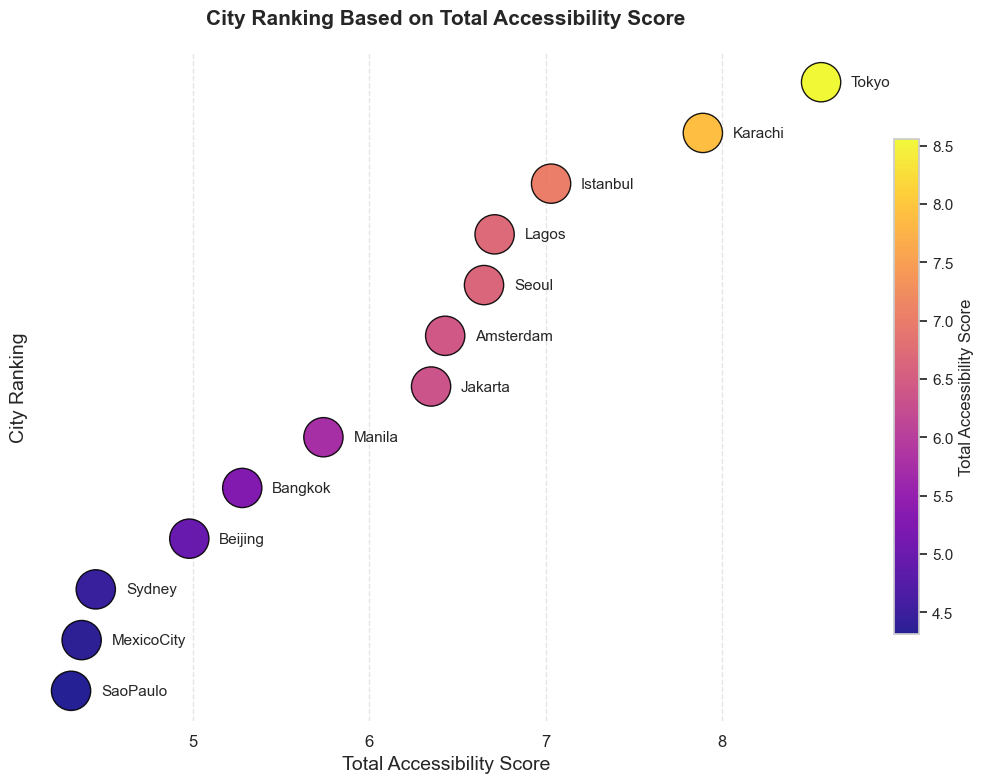

In [9]:
# Let's create a "journal-level" refined version of the scatter plot
df = pd.read_csv('AverageCityScore1.csv')
df_sorted = df.sort_values(by='TotalScore', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=df_sorted['TotalScore'],
    y=range(len(df_sorted)),
    c=df_sorted['TotalScore'],
    s=800,  # Bigger, more elegant bubbles
    cmap='plasma',  # More academic and minimalistic colormap
    edgecolors='black',
    linewidths=1,
    alpha=0.9,

)

# Annotate each point with city names, clean font
for i, row in df_sorted.iterrows():
    plt.text(row['TotalScore'] + 0.17, i, row['City'], verticalalignment='center', fontsize=11, fontweight='medium')

# Aesthetics
plt.gca().invert_yaxis()  # Highest ranked city on top
plt.colorbar(scatter, label='Total Accessibility Score', fraction=0.028, pad=0.04)
plt.title('City Ranking Based on Total Accessibility Score', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Total Accessibility Score', fontsize=14)
plt.ylabel('City Ranking', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([])  # Hide y-axis numbers for a cleaner look
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.box(False)  # No border around the plot
plt.tight_layout()
#plt.savefig('03CityRanking.png', dpi = 1500, bbox_inches='tight')
plt.show()



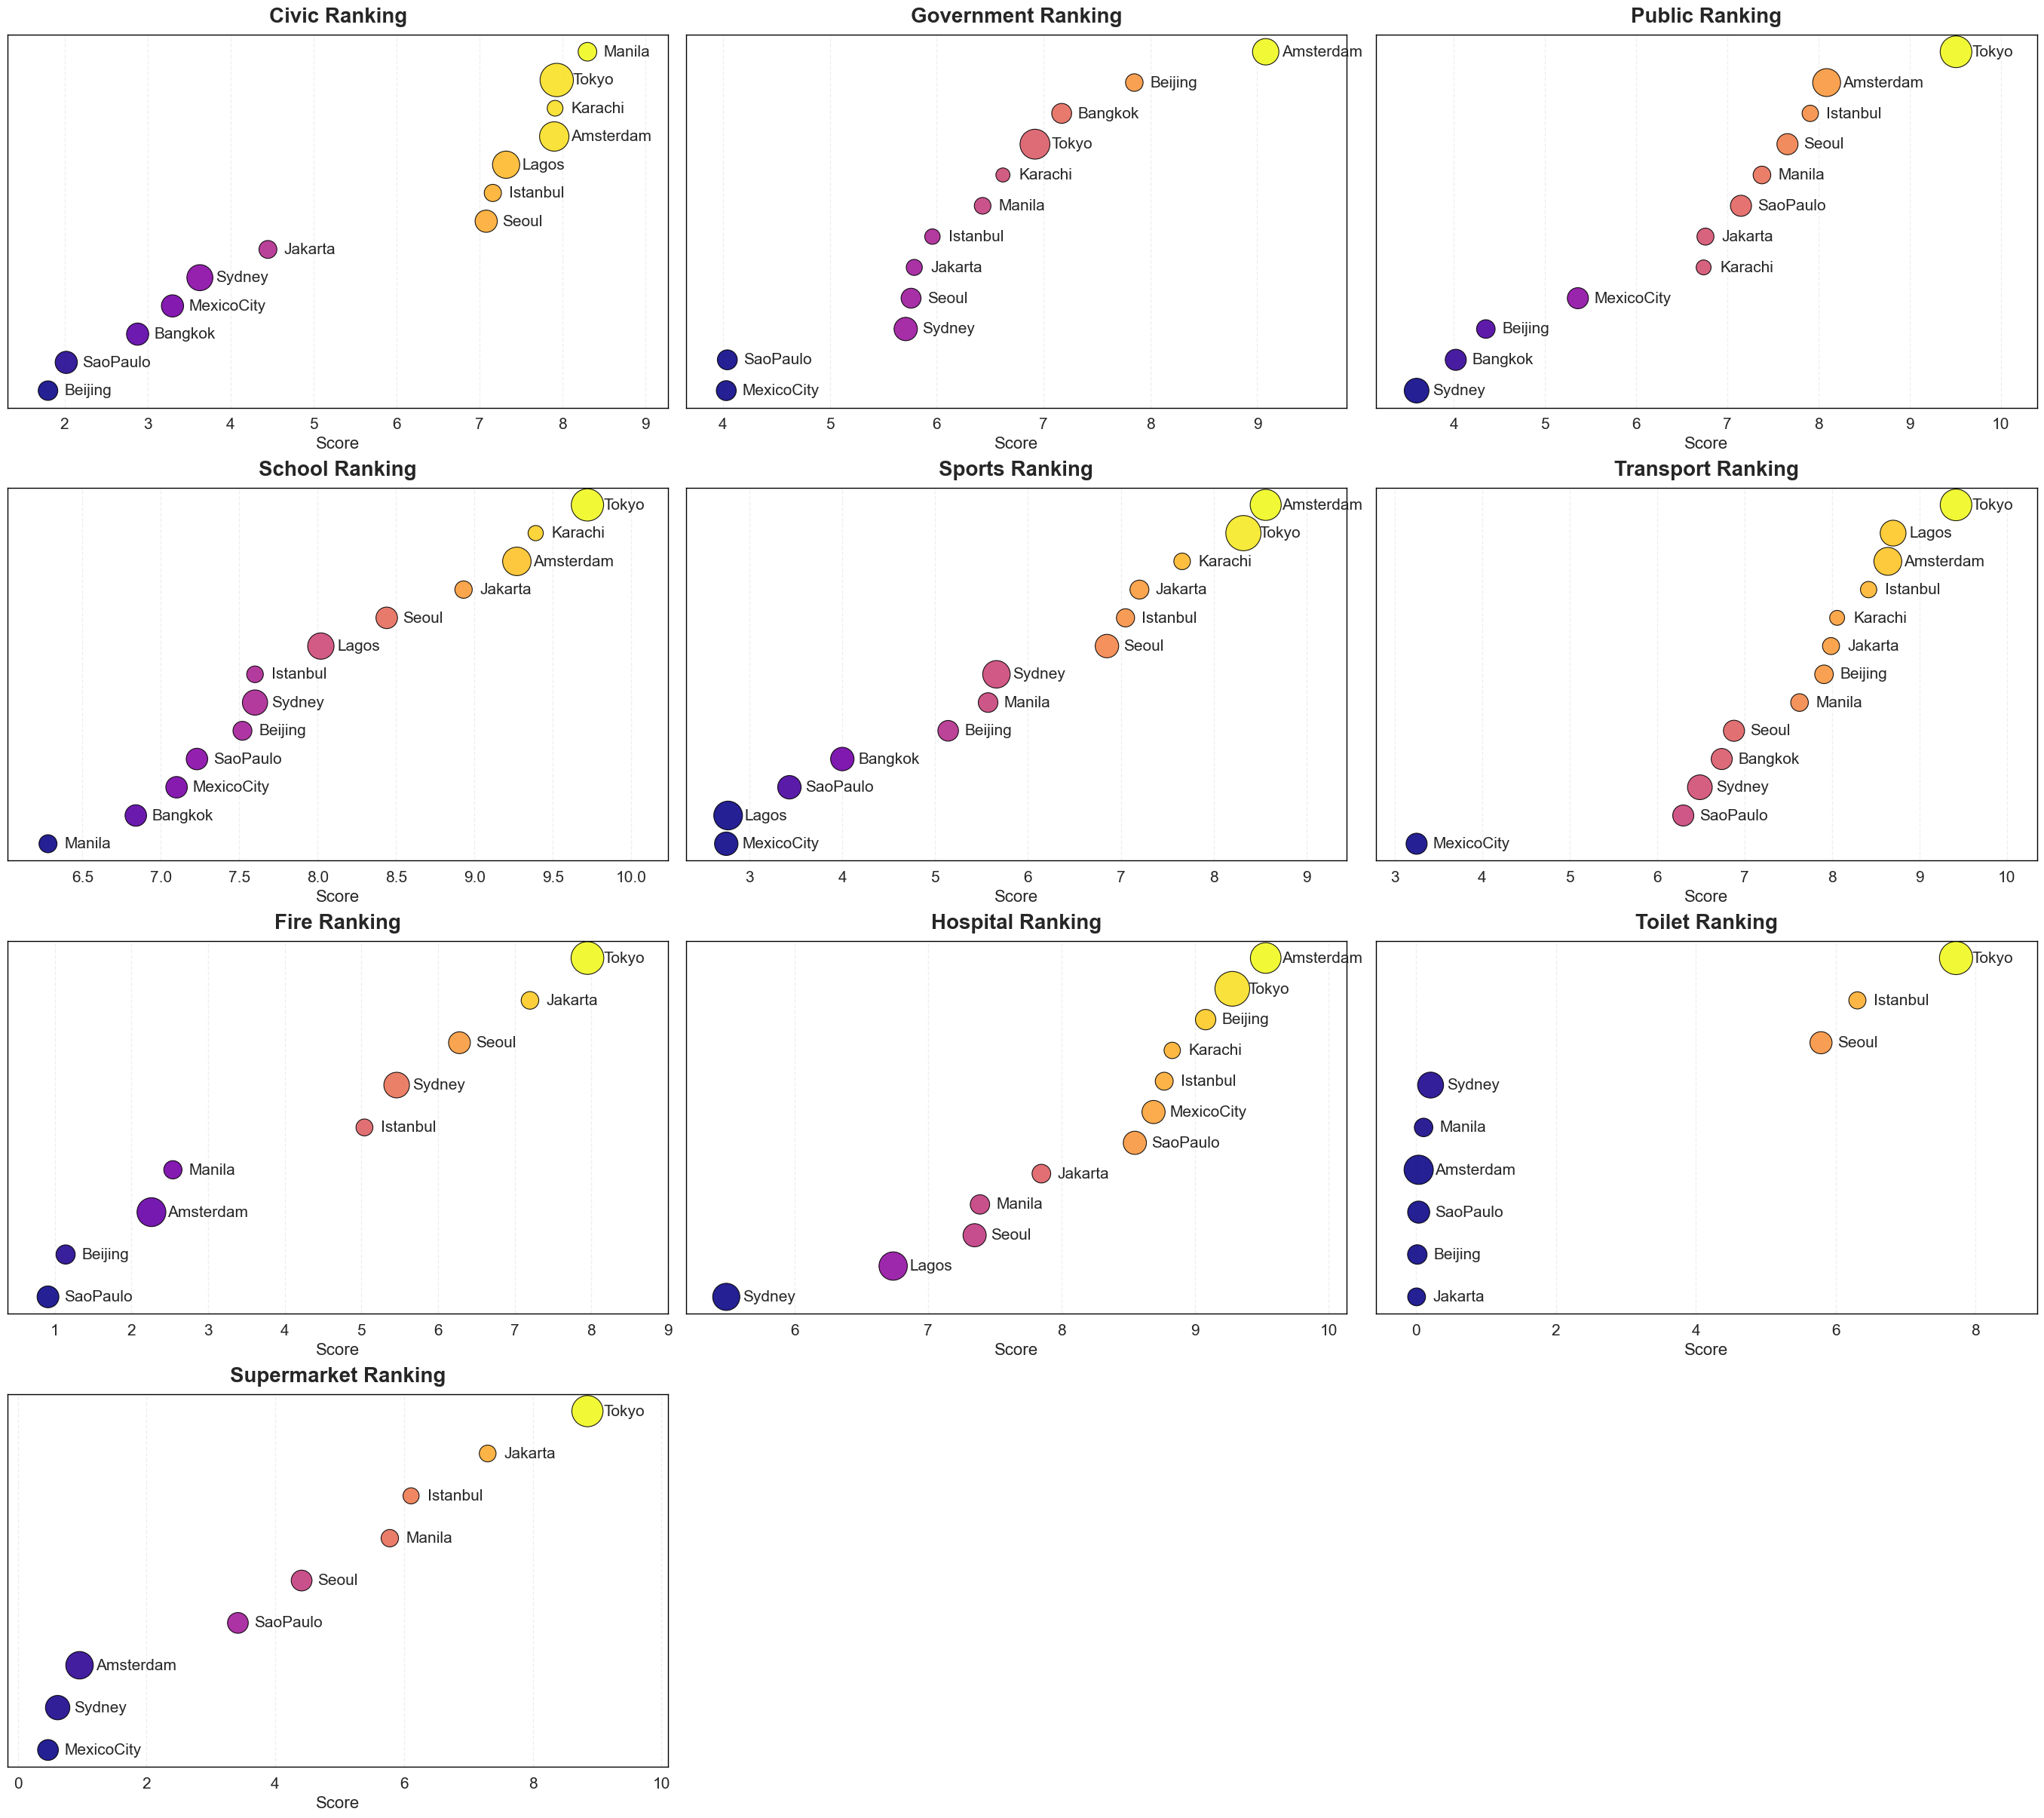

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define base size ranges for cities
def get_marker_size(city, base_scale=1.0):
    if city == 'Tokyo':
        return 900 * base_scale
    elif city == 'Amsterdam':
        return 700 * base_scale
    elif city == 'Lagos':
        return 600 * base_scale
    elif city == 'Sydney':
        return 550 * base_scale
    elif city == 'Karachi':
        return 200 * base_scale
    elif city == 'Istanbul':
        return 240 * base_scale
    elif city == 'Jakarta':
        return 260 * base_scale
    elif city == 'Manila':
        return 280 * base_scale
    elif city == 'Beijing':
        return 310 * base_scale
    else:
        return 400 * base_scale

# Filter only the _Score columns
score_cols = [col for col in df.columns if col.endswith('_Score')]

# Layout settings
n_cols = 3
n_rows = (len(score_cols) + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 9, n_rows * 6), constrained_layout=True)
axs = axs.flatten()
fig.patch.set_facecolor('white')

# Loop through each score column
for idx, score_col in enumerate(score_cols):
    ax = axs[idx]

    # Filter and sort
    df_filtered = df[['City', score_col]].dropna().sort_values(by=score_col, ascending=False).reset_index(drop=True)

    x_vals = df_filtered[score_col]
    y_vals = range(len(df_filtered))

    # Random scale variation for this subplot
    scale_factor = np.random.uniform(0.9, 1.3)

    # Get dynamic sizes
    sizes = [get_marker_size(city, base_scale=scale_factor) for city in df_filtered['City']]

    # Scatter plot
    scatter = ax.scatter(
        x=x_vals,
        y=y_vals,
        c=x_vals,
        cmap='plasma',
        s=sizes,
        edgecolors='black',
        linewidths=0.8,
        alpha=0.9
    )

    # X axis adjustments
    x_min, x_max = x_vals.min(), x_vals.max()
    x_range = x_max - x_min
    x_buffer = x_range * 0.15
    text_offset = x_range * 0.03

    ax.set_xlim(x_min - x_buffer * 0.5, x_max + x_buffer)

    # City labels
    for i, row in df_filtered.iterrows():
        x_pos = min(row[score_col] + text_offset, x_max + x_buffer * 0.9)
        ax.text(x_pos, i, row['City'], va='center', ha='left', fontsize=15)

    ax.invert_yaxis()
    ax.set_title(f'{score_col.replace("_Score", "")} Ranking', fontsize=20, fontweight='bold', pad=12)
    ax.set_xlabel('Score', fontsize=16)
    ax.tick_params(axis='x', labelsize=15)
    ax.set_yticks([])
    ax.grid(axis='x', linestyle='--', alpha=0.3)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

# Remove extra axes if any
for j in range(len(score_cols), len(axs)):
    fig.delaxes(axs[j])

fig.savefig('000Final_Score_Plots_Revised.png', dpi=1150, bbox_inches='tight')
plt.show()

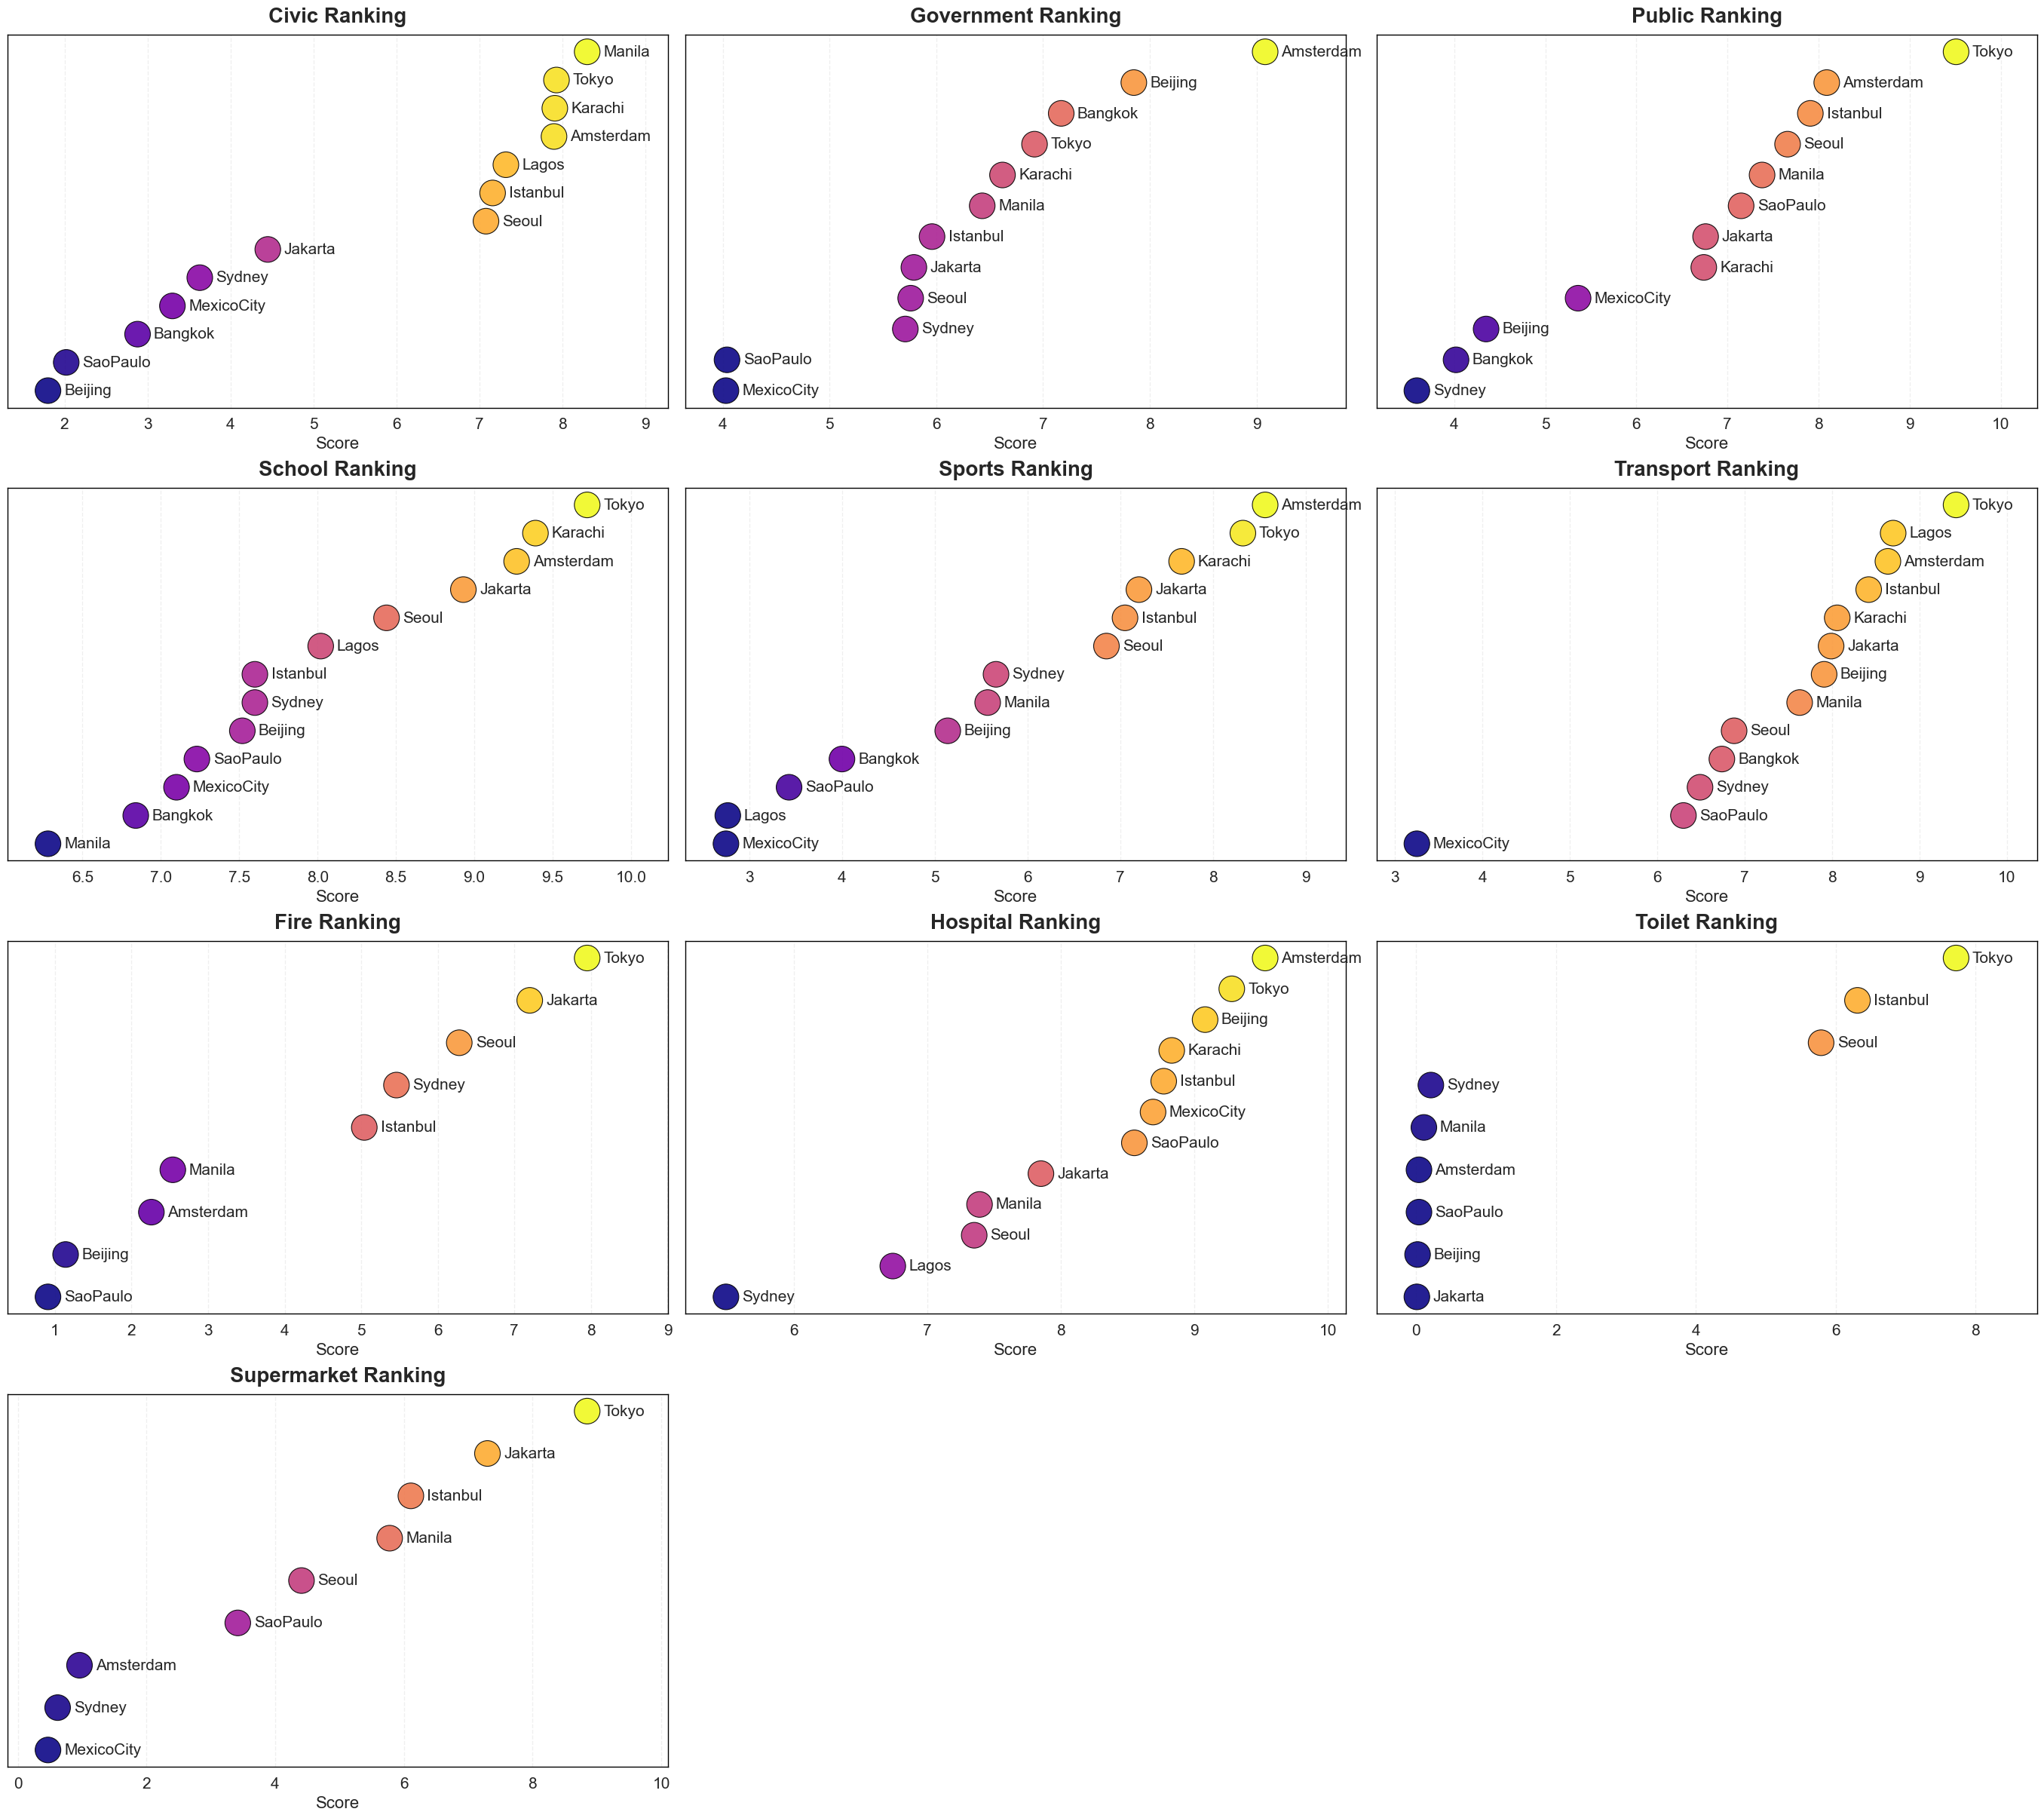

In [10]:
import matplotlib.pyplot as plt

# Filter only the _Score columns
score_cols = [col for col in df.columns if col.endswith('_Score')]

# Layout settings
n_cols = 3
n_rows = (len(score_cols) + n_cols - 1) // n_cols

# Create subplots with better spacing and constrained layout
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 9, n_rows * 6),
                        constrained_layout=True)
axs = axs.flatten()
fig.patch.set_facecolor('white')

for idx, score_col in enumerate(score_cols):
    ax = axs[idx]

    # Filter valid data and sort by score
    df_filtered = df[['City', score_col]].dropna().sort_values(by=score_col, ascending=False).reset_index(drop=True)

    x_vals = df_filtered[score_col]
    y_vals = range(len(df_filtered))

    # Plot scatter
    scatter = ax.scatter(
        x=x_vals,
        y=y_vals,
        c=x_vals,
        cmap='plasma',
        s=600,
        edgecolors='black',
        linewidths=0.8,
        alpha=0.9
    )

    # Calculate limits and buffers
    x_min, x_max = x_vals.min(), x_vals.max()
    x_range = x_max - x_min
    x_buffer = x_range * 0.15   # more right padding
    text_offset = x_range * 0.03
    
    # Apply new limits
    ax.set_xlim(x_min - x_buffer * 0.5, x_max + x_buffer)
    
    # Plot + labels with clipped offset if needed
    for i, row in df_filtered.iterrows():
        # Prevent label from exceeding max xlim
        x_pos = min(row[score_col] + text_offset, x_max + x_buffer * 0.9)
        ax.text(x_pos, i, row['City'], va='center', ha='left', fontsize=15)


    # Invert y for ranking
    ax.invert_yaxis()

    # Axes and styling
    ax.set_title(f'{score_col.replace("_Score", "")} Ranking', fontsize=20, fontweight='bold', pad=12)
    ax.set_xlabel('Score', fontsize=16)  # axis label
    ax.tick_params(axis='x', labelsize=15)  # tick label size
    ax.set_yticks([])
    ax.grid(axis='x', linestyle='--', alpha=0.3)

    # Frame/border around subplot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

# Remove extra unused axes
for j in range(len(score_cols), len(axs)):
    fig.delaxes(axs[j])

# Show the plot
#fig.savefig('000Final_Score_Plots.png', dpi=1150, bbox_inches='tight')
plt.show()
# To save:

In [ ]:
'''import pandas as pd
import numpy as np

# Load the uploaded file
df = pd.read_csv('AllCitiesMerged1.csv')

# Display the first few rows to understand the structure
df.head()
# Define a function to calculate Gini coefficient
def gini_coefficient(x):
    x = np.array(x)
    x = x.flatten()
    if np.amin(x) < 0:
        x -= np.amin(x)  # values cannot be negative
    x += 0.0000001  # values cannot be 0
    x = np.sort(x)
    n = x.shape[0]
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n - 1) * x)) / (n * np.sum(x)))

# Scores columns
score_columns = [col for col in df.columns if col.endswith('_Score')]

# Group by city and calculate Gini for each score
gini_table = df.groupby('City')[score_columns].apply(lambda x: x.apply(gini_coefficient))

# Reset index for a cleaner table
gini_table = gini_table.reset_index()'''

In [ ]:
'''for col in gini_table.columns:
    try:
        gini_table[col] = np.round(gini_table[col],2)
    except:
        pass'''

In [ ]:
df_sorted_total = df.sort_values(by='TotalScore', ascending=False)

In [ ]:
#gini_table

In [ ]:
'''import matplotlib.pyplot as plt

# Basic setup for plots
plt.rcParams["figure.figsize"] = (10, 6)

# Plot 1: Total Accessibility Score by City (Bar Chart)
df_sorted_total = df.sort_values(by='TotalScore', ascending=False)
plt.bar(df_sorted_total['City'], df_sorted_total['TotalScore'])
plt.xlabel('City')
plt.ylabel('Total Accessibility Score')
plt.title('Total Accessibility Score by City')
plt.xticks(rotation=45)
plt.show()
'''

In [ ]:
df.columns

In [ ]:
scores_columns

In [ ]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Use only _Score columns except 'TotalScore'
score_cols = [col for col in df.columns if col.endswith('_Score') and col != 'TotalScore']

# Ensure 'City' is a column before setting as index
df_reset = df.reset_index() if 'City' not in df.columns else df
heatmap_data = df_reset.set_index('City')[score_cols]

# Plot heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Accessibility Scores Across Cities', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Accessibility Category', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# plt.savefig('03CityVsScore.png', dpi=1000, bbox_inches='tight')
plt.tight_layout()
plt.show()
'''

In [ ]:
score_cols = [col for col in df.columns if col.endswith('_Score') and col != 'TotalScore']

In [ ]:
# Plot 3: Top 5 and Bottom 5 Cities by Total Accessibility Score (Horizontal Bar Chart)

# Top 5 Cities
top_5 = df_sorted_total.head(5)
# Bottom 5 Cities
bottom_5 = df_sorted_total.tail(5)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Top 5 Cities
axs[0].barh(top_5['City'], top_5['TotalScore'], align='center')
axs[0].set_title('Top 5 Cities by Total Accessibility Score')
axs[0].invert_yaxis()  # Highest scores on top
axs[0].set_xlabel('Total Accessibility Score')

# Bottom 5 Cities
axs[1].barh(bottom_5['City'], bottom_5['TotalScore'], align='center', color='orange')
axs[1].set_title('Bottom 5 Cities by Total Accessibility Score')
axs[1].invert_yaxis()  # Lowest scores on top
axs[1].set_xlabel('Total Accessibility Score')

plt.show()


In [ ]:
# Plot 4: Category-Wise Average Accessibility Score Across All Cities (Bar Chart)
df = pd.read_csv('AllCitiesMerged1.csv')
# Compute the average score for each category
score_cols = [col for col in df.columns if col.endswith('_Score')]
category_means = df[score_cols].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(category_means.index, category_means.values)
plt.xticks(rotation=45)
plt.ylabel('Average Accessibility Score')
plt.title('Average Accessibility Score by Category Across All Cities')
plt.show()


In [ ]:
# Plot 5: Radar Chart for Top 3 Cities (based on TotalScore)

from math import pi

def create_radar_chart(df, city_names):
    # Number of variables we're plotting
    categories = list(df.columns[1:-1])
    N = len(categories)

    # Create the figure
    plt.figure(figsize=(8, 8))

    # For each city
    for city in city_names:
        values = df[df['City'] == city].iloc[0, 1:-1].tolist()
        values += values[:1]  # Repeat the first value to close the circle

        # Create angles
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Plot each city
        plt.polar(angles, values, label=city)

    # Add labels for each axis
    plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories, color='grey', size=8)

    plt.title('Radar Chart for Top 3 Cities by Accessibility Score', size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Get top 3 cities
top_3_cities = df_sorted_total.head(3)['City'].tolist()
create_radar_chart(df, top_3_cities)


In [ ]:
df['City'].value_counts()

In [ ]:
import seaborn as sns
# Correlation analysis between different accessibility categories
scores_columns = [col for col in df.columns if col.endswith('_Score')]
correlation_matrix = df[scores_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Accessibility Categories Across Cities')
plt.savefig('000ScoreVsScore.png', dpi = 1000, bbox_inches='tight')
plt.show()


Strong Positive Correlations:
Hospital_Score and Transport_Score show a strong correlation, suggesting that cities with good hospital accessibility often also have better transport infrastructure.
School_Score correlates well with Transport_Score, meaning cities with accessible schools typically have strong transport services.
Moderate Correlations:
Public_Score has moderate correlations with both School_Score and Transport_Score.
Low/Negative Correlations:
Fire_Score has weak or no significant correlations with most other categories. Some cities may prioritize fire services differently.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scores columns (exclude 'City' and 'TotalScore' if needed)
scores_columns = [col for col in df.columns if col.endswith('_Score') and col != 'TotalScore']

# Fill missing values with 0
X = df[scores_columns].fillna(0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
'''from sklearn.decomposition import PCA

# Run K-Means with K=3
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster information to the dataframe
df['Cluster'] = clusters

# Reduce dimensions to 2 principal components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create a scatter plot of the PCA components colored by cluster
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='Set1', s=100)

# Annotate cities
for i, city in enumerate(df['City']):
    plt.annotate(city, (pca_components[i, 0]+0.1, pca_components[i, 1]+0.1))

plt.title('PCA Visualization of Cities Clustering (K=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()
'''

Cities have been grouped into 3 clusters based on their accessibility profiles.
Cities in the same cluster share similar accessibility characteristics.
There’s clear separation between clusters, showing distinct city profiles.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define features and target
X = df[scores_columns]
y = df['TotalScore']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

# Coefficients (importance of each feature)
coefficients = pd.Series(model.coef_, index=scores_columns)

# Display results
r2, rmse, coefficients.sort_values(ascending=False)


In [ ]:
# Fix column selection for grouping by cluster
cluster_columns = list(scores_columns) + ['TotalScore']

# Group by cluster and compute mean scores
cluster_profiles = df.groupby('Cluster')[cluster_columns].mean().round(2)

cluster_profiles


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(18, 6))
dendrogram(linked, labels=df['City'].to_list(), orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('City')
plt.ylabel('Distance')
plt.show()


This dendrogram shows how similar or different the cities are in terms of accessibility scores.
Cities joined lower on the tree are more similar, while those connected higher up are more distinct.
You can cut the tree at different heights to get different numbers of clusters (more granular or broader groupings).


In [ ]:
ff= pd.read_csv("BangkokScoreRAW.csv")

In [ ]:
ff.columns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load dataset
df1 = pd.read_csv('AllCitiesMerged1.csv', low_memory=False)

# Optional: ensure TotalScore is numeric
df1['TotalScore'] = pd.to_numeric(df1['TotalScore'], errors='coerce')

# Optional: Add city column if not present
# df1['City'] = ...

# Group by city (if applicable), or if you just want 1 KDE:
city_scores = [df1['TotalScore'].dropna()]
city_names = ['All Cities']  # Add more if you're looping over multiple cities

# Fit KDE
kdes = [gaussian_kde(scores) for scores in city_scores]

# Global range for TotalScore
score_min, score_max = df1['TotalScore'].min(), df1['TotalScore'].max()
x_vals = np.linspace(score_min, score_max, 200)

# Plot
plt.figure(figsize=(12, 8))
for city, kde in zip(city_names, kdes):
    y_vals = kde(x_vals)
    plt.plot(x_vals, y_vals, label=city, alpha=0.8)

# Final touches
plt.title('Distribution of TotalScore Across Cities')
plt.xlabel('TotalScore', fontsize=14)
plt.ylabel('Density (KDE)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# df1 contains merged data for all 14 cities
# Assumption: df1 has columns 'City' and 'TotalScore'

# 1) Get the list of unique cities
city_names = df1['City'].unique()

# 2) Create a consistent x-range across all cities
all_scores_combined = df1['TotalScore'].dropna()
score_min, score_max = all_scores_combined.min(), all_scores_combined.max()
x_vals = np.linspace(score_min, score_max, 200)

# 3) Loop through each city and plot its KDE
for city in city_names:
    # Filter the data for the city
    city_data = df1[df1['City'] == city]['TotalScore'].dropna()

    # Check if there are enough data points to fit a KDE
    if len(city_data) < 2:
        print(f"Not enough data to plot KDE for {city}")
        continue

    # Fit KDE
    kde = gaussian_kde(city_data)
    y_vals = kde(x_vals)

    # Create plot
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label=f'{city}', alpha=0.8)
    plt.fill_between(x_vals, y_vals, alpha=0.3)

    # Plot decorations
    plt.title(f'Distribution of TotalScore in {city}')
    plt.xlabel('TotalScore')
    plt.ylabel('Density (KDE)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig(f'{city}_TotalScore_KDE.png', dpi=1000)
    # Show plot
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load and clean data
df1 = pd.read_csv("AllCitiesMerged1.csv", low_memory=False)
df1['TotalScore'] = pd.to_numeric(df1['TotalScore'], errors='coerce')
df1 = df1.dropna(subset=['TotalScore', 'City'])

# KDE prep
x_vals = np.linspace(0, 10, 500)
city_kdes = {}
city_means = {}

# KDE for each city
city_groups = df1.groupby('City')
for city, group in city_groups:
    scores = group['TotalScore'].dropna()
    kde = gaussian_kde(scores)
    city_kdes[city] = kde(x_vals)
    city_means[city] = scores.mean()

# Determine low/mid/high based on quantiles
mean_series = pd.Series(city_means)
q33, q66 = mean_series.quantile([0.33, 0.66])

clusters = {'Low': [], 'Medium': [], 'High': []}
for city, mean_score in city_means.items():
    if mean_score < q33:
        clusters['Low'].append(city)
    elif mean_score < q66:
        clusters['Medium'].append(city)
    else:
        clusters['High'].append(city)

# Plot 3 subplots for Low, Medium, High clusters
fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)
cluster_order = ['Low', 'Medium', 'High']

for ax, category in zip(axes, cluster_order):
    for city in clusters[category]:
        ax.plot(x_vals, city_kdes[city], label=city)
    ax.set_title(f'{category} TotalScore Cities', fontsize=14, fontweight='bold')
    ax.set_xlabel('TotalScore')
    ax.grid(True)
    ax.legend(fontsize=9)

axes[0].set_ylabel('Density (KDE)')
plt.tight_layout()
#plt.savefig('03KDE_LowMediumHigh.png', dpi=1800)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load data
df1 = pd.read_csv("AllCitiesMerged1.csv", low_memory=False)
df1 = df1.dropna(subset=['City'])

# Convert all score columns to numeric
score_cols = [col for col in df1.columns if col.endswith('_Score') and col != 'TotalScore']
for col in score_cols:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Score range for KDE
x_vals = np.linspace(0, 10, 500)

# Loop through each individual _Score column
for score_col in score_cols:
    city_kdes = {}
    city_means = {}

    # KDE and mean for each city
    city_groups = df1.groupby('City')
    for city, group in city_groups:
        scores = group[score_col].dropna()
        if len(scores) < 2:
            continue  # Skip cities with insufficient data
        kde = gaussian_kde(scores)
        city_kdes[city] = kde(x_vals)
        city_means[city] = scores.mean()

    if not city_kdes:
        continue

    # Determine quantile thresholds
    mean_series = pd.Series(city_means)
    q33, q66 = mean_series.quantile([0.33, 0.66])

    # Group cities by score level
    clusters = {'Low': [], 'Medium': [], 'High': []}
    for city, mean_score in city_means.items():
        if mean_score < q33:
            clusters['Low'].append(city)
        elif mean_score < q66:
            clusters['Medium'].append(city)
        else:
            clusters['High'].append(city)

    # Plot subplots for current score column
    fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)
    cluster_order = ['Low', 'Medium', 'High']

    for ax, category in zip(axes, cluster_order):
        for city in clusters[category]:
            ax.plot(x_vals, city_kdes[city], label=city)
        ax.set_title(f'{category} Score Cities - {score_col.replace("_Score", "")}', fontsize=20, fontweight='bold')
        ax.set_xlabel(score_col.replace('_Score', ' Score'))
        ax.grid(True)
        ax.legend(fontsize=11)

    axes[0].set_ylabel('Density (KDE)')
    plt.tight_layout()
    plt.savefig(f'000KDE_LowMidHigh_{score_col}.png', dpi=1000)
    plt.show()


In [ ]:
'''import pandas as pd
import os

# Load the data
df = pd.read_csv('AllCitiesMerged.csv')

# Create output folder if needed
output_folder = r"C:\Users\Apoorva\Desktop\Thesis\Analysis\Tableau"
os.makedirs(output_folder, exist_ok=True)

# Loop over unique city names
for city in df['City'].unique():
    city_df = df[df['City'] == city]
    
    # Clean city name (remove spaces or special characters if needed)
    safe_city_name = city.replace(" ", "_").replace("/", "_")
    
    # Save to CSV
    output_path = os.path.join(output_folder, f"Tableau_{safe_city_name}.csv")
    city_df.to_csv(output_path, index=False)

print("✅ All city CSV files have been saved!")
'''


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load your dataset
df = pd.read_csv('AllCitiesMerged1.csv')

# Filter numeric score columns only (excluding non-scores like 'City')
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Group by City and take mean (safe way)
avg_df = df.groupby('City', as_index=False)[score_columns].mean()

# Seaborn style setup for professional visual
sns.set_theme(style="whitegrid", context="talk", font_scale=1.2)

# Number of plots
n_scores = len(score_columns)
n_cols = 3
n_rows = math.ceil(n_scores / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows * 5), constrained_layout=True)
axes = axes.flatten()

# Color palette
palette = sns.color_palette("tab10", n_colors=len(avg_df['City'].unique()))

# Plot each score
for idx, score in enumerate(score_columns):
    ax = axes[idx]

    # Plot all cities for this score
    sns.lineplot(
        data=avg_df,
        x='City',
        y=score,
        marker='o',
        markersize=8,
        linewidth=3.0 if 'total' in score.lower() else 2.2,
        ax=ax,
        color=sns.color_palette("husl", n_scores)[idx]
    )

    ax.set_title(score.replace('_', ' ').title(), fontsize=18, weight='bold', pad=15)
    ax.set_xlabel('')
    ax.set_ylabel('Score', fontsize=12)
    ax.set_xticklabels(avg_df['City'], rotation=45, ha='right')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove any unused axes
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

# Big Title
fig.suptitle('Infrastructure and Service Scores Across Cities', fontsize=28, weight='bold', y=1.04)

# Save high-quality image
plt.savefig('000Individual_Score_Lineplots.png', dpi=1100, bbox_inches='tight')

# Show
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Optionally, install mplcyberpunk if you want neon style:
# pip install mplcyberpunk

# Load your dataset
df = pd.read_csv('AllCitiesMerged1.csv')

# Filter numeric score columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Setup style
sns.set_theme(style="white", context="talk", font_scale=1.3)
plt.rcParams['font.family'] = 'DejaVu Sans'  # More professional sans-serif font
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titleweight'] = 'bold'

# Number of plots
n_scores = len(score_columns)
n_cols = 3
n_rows = math.ceil(n_scores / n_cols)

# Color Palette
city_list = df['City'].unique()
palette = sns.color_palette("Spectral", n_colors=len(city_list))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 6), constrained_layout=True)
axes = axes.flatten()

# Plot each score
for idx, score in enumerate(score_columns):
    ax = axes[idx]

    for color, city in zip(palette, city_list):
        city_data = df[df['City'] == city][score]
        sns.kdeplot(
            city_data,
            label=city,
            fill=True,
            alpha=0.15,
            linewidth=3.8,
            color=color,
            ax=ax
        )

    ax.set_title(score.replace('_', ' ').title(), fontsize=20, pad=15, color='#2C3E50')
    ax.set_xlabel('', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#555')
    ax.spines['bottom'].set_color('#555')

    ax.legend(title='City', loc='best', fontsize=12, title_fontsize=13, frameon=False)

# Remove unused axes
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

# Overall figure title
fig.suptitle('City-wise Distribution of Infrastructure and Service Scores', fontsize=32, weight='bold', color='#1F2D3D', y=1.02)

# Save
plt.savefig('000KDE_Plots_Across_Cities3_legend800.png', dpi=1150, bbox_inches='tight')

# Show
plt.show()


In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Optionally, install mplcyberpunk if you want neon style:
# pip install mplcyberpunk

# Load your dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Filter numeric score columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Setup style
sns.set_theme(style="white", context="talk", font_scale=1.3)
plt.rcParams['font.family'] = 'DejaVu Sans'  # More professional sans-serif font
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titleweight'] = 'bold'

# Number of plots
n_scores = len(score_columns)
n_cols = 3
n_rows = math.ceil(n_scores / n_cols)

# Color Palette
city_list = df['City'].unique()
palette = sns.color_palette("Spectral", n_colors=len(city_list))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 6), constrained_layout=True)
axes = axes.flatten()

# Plot each score
for idx, score in enumerate(score_columns):
    ax = axes[idx]

    for color, city in zip(palette, city_list):
        city_data = df[df['City'] == city][score]
        sns.kdeplot(
            city_data,
            label=city,
            fill=True,
            alpha=0.15,
            linewidth=3.5,
            color=color,
            ax=ax
        )

    ax.set_title(score.replace('_', ' ').title(), fontsize=20, pad=15, color='#2C3E50')
    ax.set_xlabel('', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#555')
    ax.spines['bottom'].set_color('#555')

    ax.legend(title='City', loc='best', fontsize=12, title_fontsize=13, frameon=False)

# Remove unused axes
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

# Overall figure title
fig.suptitle('City-wise Distribution of Infrastructure and Service Scores', fontsize=32, weight='bold', color='#1F2D3D', y=1.02)

# Save
plt.savefig('3KDE_Plots_Across_Cities3_legend300.png', dpi=300, bbox_inches='tight')

# Show
plt.show()
'''

In [ ]:
df.columns

In [ ]:
import numpy as np

def gini_coefficient(x):
    """Compute Gini index for a numpy array."""
    x = np.sort(x)
    n = len(x)
    cumulative_x = np.cumsum(x)
    relative_mean = cumulative_x / cumulative_x[-1]
    gini = 1 - 2 * np.sum(relative_mean - (1 / n) * (np.arange(1, n + 1)))
    return gini


In [ ]:
'''import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import geodatasets

# Load dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lon'], df['lat']),
    crs="EPSG:4326"
)

# Create Rank
gdf['Rank'] = range(1, len(gdf) + 1)

# Optimized Colormap
cmap = plt.colormaps.get_cmap('plasma').resampled(14)

# Start Plot
fig, ax = plt.subplots(figsize=(20, 12))

# ✅ Instead of loading full world boundaries (heavy)
# just set world outline using basemap only
# Or if you still want world, load *only lightweight simplified shape*
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
world.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5, alpha=0.2)  # minimal load

# Plot cities without forcing legend recalculation
gdf.plot(
    ax=ax,
    markersize=100,
    c=gdf['Rank'],
    cmap=cmap,
    legend=False,
    alpha=0.9,
    edgecolor='black'
)

# Annotate directly
for idx, row in gdf.iterrows():
    ax.annotate(
        f"{row['Rank']}. {row['City']}",
        xy=(row['lon'], row['lat']),
        xytext=(4, 4),
        textcoords="offset points",
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Limit map to only bounding box around cities (zoom in automatically) ✅
margin = 10  # degrees
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx - margin, maxx + margin)
ax.set_ylim(miny - margin, maxy + margin)

# Add lower-resolution basemap (tiles limited to bounding box)
ctx.add_basemap(
    ax,
    crs=gdf.crs,
    source=ctx.providers.CartoDB.Positron,
    zoom=2  # ✅ Reduce zoom level to reduce load (2~3 is fast)
)

# Clean final touches
ax.set_axis_off()
ax.set_title('City Rankings on World Map', fontsize=28, weight='bold', color='#2C3E50', pad=20)

# Save
plt.savefig('World_Map_City_Ranking_Optimized.png', dpi=300, bbox_inches='tight')
plt.show()
'''

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Load dataset
df = pd.read_csv('AllCitiesMerged1.csv')

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lon'], df['lat']),
    crs="EPSG:4326"
)

# Create Rank
gdf['Rank'] = range(1, len(gdf) + 1)
print('1')
# Optimized Colormap
cmap = plt.colormaps.get_cmap('plasma').resampled(14)

# Start Plot
fig, ax = plt.subplots(figsize=(18, 10))
print('1')
# ✅ Skip plotting world altogether
# Just plot cities
gdf.plot(
    ax=ax,
    markersize=100,
    c=gdf['Rank'],
    cmap=cmap,
    legend=False,
    alpha=0.9,
    edgecolor='black'
)
print('1')
# ✅ Faster annotation (minimal styling inside loop)
for idx, row in gdf.iterrows():
    ax.annotate(
        f"{row['Rank']}. {row['City']}",
        xy=(row['lon'], row['lat']),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=9
    )
print('1')
# ✅ Tight bounding box
margin = 5  # Reduce margin to avoid too much empty map
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx - margin, maxx + margin)
ax.set_ylim(miny - margin, maxy + margin)
print('1')
# ✅ Add basemap AFTER zooming (so it loads only small area)
ctx.add_basemap(
    ax,
    crs=gdf.crs,
    source=ctx.providers.CartoDB.Positron,
    zoom=1  # Super low zoom = very fast
)
print('1')
# Clean
ax.set_axis_off()
ax.set_title('City Rankings on World Map (Fast Optimized)', fontsize=24, weight='bold', pad=20)

# Save
plt.savefig('World_Map_City_Ranking_SuperOptimized.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Gini
def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    cumulative_x = np.cumsum(x)
    relative_mean = cumulative_x / cumulative_x[-1]
    gini = 1 - 2 * np.sum(relative_mean - (1 / n) * (np.arange(1, n + 1)))
    return gini

# Load dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Select numeric score columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Calculate average Gini per city
city_ginis = {}
for city in df['City'].unique():
    city_df = df[df['City'] == city]
    ginis = []
    for score in score_columns:
        values = city_df[score].dropna()
        if len(values) > 0:
            ginis.append(gini_coefficient(values.values))
    city_ginis[city] = np.nanmean(ginis)

# Prepare data
cities = list(city_ginis.keys())
gini_values = list(city_ginis.values())

# Random positions for stars
np.random.seed(42)
x = np.random.uniform(0, 1, len(cities))
y = np.random.uniform(0, 1, len(cities))

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#000014')
ax.set_facecolor('#000014')

# Stars (city points)
scatter = ax.scatter(
    x, y,
    s=np.array(gini_values) * 1200,  # Size proportional to Gini
    c=gini_values, 
    cmap='plasma_r',
    alpha=0.9,
    edgecolors='white',
    linewidths=1.2
)

# Optionally, connect nearby stars to form a constellation
for i in range(len(cities)):
    for j in range(i + 1, len(cities)):
        dist = np.hypot(x[i] - x[j], y[i] - y[j])
        if dist < 0.3:  # Only connect close ones
            ax.plot([x[i], x[j]], [y[i], y[j]], color='white', alpha=0.2, linewidth=0.7)

# Add City names
for i, city in enumerate(cities):
    ax.text(
        x[i], y[i], f"{city}\n({gini_values[i]:.2f})",
        fontsize=9,
        color='white',
        ha='center', va='center'
    )

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('Constellation of Inequality (Gini Across Cities)', fontsize=24, color='white', pad=20)

# Colorbar
cbar = plt.colorbar(scatter, shrink=0.7)
cbar.set_label('Gini Index', color='white')
cbar.outline.set_edgecolor('white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

plt.tight_layout()
plt.savefig('Gini_Constellation.png', dpi=450, bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare
cities = list(city_ginis.keys())
gini_values = list(city_ginis.values())

# Create a dark background
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#001f2f')
ax.set_facecolor('#001f2f')

# Central point
center_x, center_y = 0.5, 0.5

# Plot ripples
for i, (city, gini) in enumerate(zip(cities, gini_values)):
    radius = 0.05 + gini * 0.3  # Gini controls radius
    circle = plt.Circle(
        (np.random.uniform(0.2, 0.8), np.random.uniform(0.2, 0.8)),  # Random center
        radius,
        fill=False,
        color='cyan',
        alpha=0.4 + 0.5 * gini,
        linewidth=3 * gini
    )
    ax.add_artist(circle)

    # City label
    ax.text(
        circle.center[0], circle.center[1],
        f"{city}\n({gini:.2f})",
        color='white',
        fontsize=8,
        ha='center', va='center'
    )

# Clean
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Ripples of Inequality (Gini Ripple Plot)', fontsize=24, color='white', pad=20)

plt.tight_layout()
plt.savefig('Gini_Ripple.png', dpi=450, bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume scores = dimensions of polygon (e.g., 6 sides)
n_scores = len(score_columns)

# Angles for folds
angles = np.linspace(0, 2 * np.pi, n_scores, endpoint=False)

# Create origami shape per city
fig, axes = plt.subplots(4, 4, figsize=(16, 16), subplot_kw={'polar': True})
axes = axes.flatten()

for idx, (city, ginis) in enumerate(gini_dict.items()):
    ax = axes[idx]
    ginis = np.array(ginis)
    angles_loop = np.append(angles, angles[0])
    ginis_loop = np.append(ginis, ginis[0])

    ax.plot(angles_loop, ginis_loop, color='lime', linewidth=2)
    ax.fill(angles_loop, ginis_loop, color='lime', alpha=0.3)

    ax.set_title(city, fontsize=10, pad=10, color='white')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_facecolor('#111')
    ax.grid(False)
    ax.spines['polar'].set_color('white')

# Remove unused axes
for i in range(len(gini_dict), len(axes)):
    fig.delaxes(axes[i])

fig.patch.set_facecolor('#111')
fig.suptitle('Origami Folds of Inequality (Gini Across Scores)', fontsize=26, color='white', weight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Gini_Origami.png', dpi=450, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joypy

# Function to calculate Gini
def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    cumulative_x = np.cumsum(x)
    relative_mean = cumulative_x / cumulative_x[-1]
    gini = 1 - 2 * np.sum(relative_mean - (1 / n) * (np.arange(1, n + 1)))
    return gini

# Load dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Numeric score columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Calculate Gini per City and per Score
gini_long = []
for city in df['City'].unique():
    city_df = df[df['City'] == city]
    for score in score_columns:
        values = city_df[score].dropna()
        if len(values) > 0:
            gini = gini_coefficient(values.values)
            gini_long.append({'City': city, 'Score': score, 'Gini': gini})

gini_df = pd.DataFrame(gini_long)

# Ridgeline Plot
fig, ax = joypy.joyplot(
    gini_df,
    by="City",
    column="Gini",
    figsize=(12, 10),
    kind="kde",
    fill=True,
    overlap=1,
    linecolor="white",
    fade=True,
    colormap=plt.cm.viridis_r,
    title="Distribution of Gini Index Across Cities",
    x_range=[0, 1]
)

plt.xlabel('Gini Index')
plt.tight_layout()
plt.savefig('Gini_Ridgeline_Cities.png', dpi=450, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate Gini
def gini_coefficient(x):
    x = np.sort(x)
    n = len(x)
    cumulative_x = np.cumsum(x)
    relative_mean = cumulative_x / cumulative_x[-1]
    gini = 1 - 2 * np.sum(relative_mean - (1 / n) * (np.arange(1, n + 1)))
    return gini

# Load dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Select numeric score columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Calculate Gini per city per score (long format)
gini_long = []
for city in df['City'].unique():
    city_df = df[df['City'] == city]
    for score in score_columns:
        values = city_df[score].dropna()
        if len(values) > 0:
            gini = gini_coefficient(values.values)
            gini_long.append({'City': city, 'Score': score, 'Gini': gini})

gini_df = pd.DataFrame(gini_long)

# Set Seaborn style
sns.set_theme(style="whitegrid", context="talk", font_scale=1.2)

# Create Beeswarm Plot
plt.figure(figsize=(16, 10))
ax = sns.swarmplot(
    data=gini_df,
    x="Gini",
    y="City",
    hue="City",
    dodge=False,
    palette="Set2",
    size=8,
    edgecolor="gray",
    linewidth=0.5
)

# Clean up legend
ax.legend_.remove()

# Titles and labels
plt.title('Beeswarm Plot of Gini Index Across Cities', fontsize=24, weight='bold', pad=20)
plt.xlabel('Gini Index')
plt.ylabel('City')
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save
plt.savefig('Gini_Beeswarm_Plot.png', dpi=450, bbox_inches='tight')
plt.show()


In [ ]:
import plotly.graph_objects as go

# Calculate average Gini for each (City, Score)
pivot = gini_df.pivot(index='City', columns='Score', values='Gini').fillna(0)

# Prepare nodes
cities = pivot.index.tolist()
scores = pivot.columns.tolist()
labels = cities + scores

# Prepare link sources and targets
sources = []
targets = []
values = []

for i, city in enumerate(cities):
    for j, score in enumerate(scores):
        gini_val = pivot.loc[city, score]
        if gini_val > 0:
            sources.append(i)          # City index
            targets.append(len(cities) + j)  # Score index after cities
            values.append(gini_val)

# Create Chord Diagram using Sankey style
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightskyblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(255,0,0,0.4)"  # light red transparent links
    )
)])

fig.update_layout(
    title_text="City-Score Gini Chord Diagram",
    font_size=12,
    title_font_size=24
)

fig.write_html('Gini_Chord_Diagram.html')
fig.show()


In [ ]:
'''import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import matplotlib.colors as mcolors
import geodatasets

# Load your dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Must have 'City', 'Latitude', 'Longitude'

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['lon'], df['lat']),
    crs="EPSG:4326"
)

# Create a 'Rank' column
gdf['Rank'] = range(1, len(gdf) + 1)

# Updated Colormap method
cmap = plt.colormaps.get_cmap('plasma').resampled(14)

# Plotting
fig, ax = plt.subplots(figsize=(20, 12))

# World map from geodatasets
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
world.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot cities
gdf.plot(
    ax=ax,
    markersize=200,
    c=gdf['Rank'],
    cmap=cmap,
    legend=True,
    alpha=0.85,
    edgecolor='black'
)

# Annotate city names + rank
for idx, row in gdf.iterrows():
    plt.annotate(
        f"{row['Rank']}. {row['City']}",
        xy=(row['lon'], row['lat']),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=11,
        fontweight='bold'
    )

# Attractive basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Clean plot
ax.set_axis_off()
ax.set_title('City Rankings on World Map', fontsize=28, fontweight='bold', color='#2C3E50', pad=20)

# Save
plt.savefig('World_Map_City_Ranking.png', dpi=450, bbox_inches='tight')

# Show
plt.show()
'''

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Optionally, install mplcyberpunk if you want neon style:
# pip install mplcyberpunk

# Load your dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Filter numeric score columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Setup style
sns.set_theme(style="white", context="talk", font_scale=1.3)
plt.rcParams['font.family'] = 'DejaVu Sans'  # More professional sans-serif font
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titleweight'] = 'bold'

# Number of plots
n_scores = len(score_columns)
n_cols = 3
n_rows = math.ceil(n_scores / n_cols)

# Color Palette
city_list = df['City'].unique()
palette = sns.color_palette("tab20", n_colors=len(city_list))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 6), constrained_layout=True)
axes = axes.flatten()

# Plot each score
for idx, score in enumerate(score_columns):
    ax = axes[idx]

    for color, city in zip(palette, city_list):
        city_data = df[df['City'] == city][score]
        sns.kdeplot(
            city_data,
            label=city,
            fill=True,
            alpha=0.25,
            linewidth=2.5,
            color=color,
            ax=ax
        )

    ax.set_title(score.replace('_', ' ').title(), fontsize=20, pad=15, color='#2C3E50')
    #ax.set_xlabel('Score Value', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#555')
    ax.spines['bottom'].set_color('#555')

    #ax.legend(title='City', loc='upper right', fontsize=12, title_fontsize=13, frameon=False)

# Remove unused axes
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

# Overall figure title
fig.suptitle('City-wise Distribution of Infrastructure and Service Scores', fontsize=32, weight='bold', color='#1F2D3D', y=1.02)

# Save
plt.savefig('Beautiful_KDE_Plots_Across_Cities1.png', dpi=450, bbox_inches='tight')

# Show
plt.show()
'''

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Optionally, install mplcyberpunk if you want neon style:
# pip install mplcyberpunk

# Load your dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Filter numeric score columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Setup style
sns.set_theme(style="white", context="talk", font_scale=1.3)
plt.rcParams['font.family'] = 'DejaVu Sans'  # More professional sans-serif font
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titleweight'] = 'bold'

# Number of plots
n_scores = len(score_columns)
n_cols = 3
n_rows = math.ceil(n_scores / n_cols)

# Color Palette
city_list = df['City'].unique()
palette = sns.color_palette("Set1", n_colors=len(city_list))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 6), constrained_layout=True)
axes = axes.flatten()

# Plot each score
for idx, score in enumerate(score_columns):
    ax = axes[idx]

    for color, city in zip(palette, city_list):
        city_data = df[df['City'] == city][score]
        sns.kdeplot(
            city_data,
            label=city,
            fill=True,
            alpha=0.25,
            linewidth=2.5,
            color=color,
            ax=ax
        )

    ax.set_title(score.replace('_', ' ').title(), fontsize=20, pad=15, color='#2C3E50')
    #ax.set_xlabel('Score Value', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#555')
    ax.spines['bottom'].set_color('#555')

    #ax.legend(title='City', loc='upper right', fontsize=12, title_fontsize=13, frameon=False)

# Remove unused axes
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

# Overall figure title
fig.suptitle('City-wise Distribution of Infrastructure and Service Scores', fontsize=32, weight='bold', color='#1F2D3D', y=1.02)

# Save
plt.savefig('Beautiful_KDE_Plots_Across_Cities2.png', dpi=450, bbox_inches='tight')

# Show
plt.show()
'''

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Optionally, install mplcyberpunk if you want neon style:
# pip install mplcyberpunk

# Load your dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Filter numeric score columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Setup style
sns.set_theme(style="white", context="talk", font_scale=1.3)
plt.rcParams['font.family'] = 'DejaVu Sans'  # More professional sans-serif font
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titleweight'] = 'bold'

# Number of plots
n_scores = len(score_columns)
n_cols = 3
n_rows = math.ceil(n_scores / n_cols)

# Color Palette
city_list = df['City'].unique()
palette = sns.color_palette("Paired", n_colors=len(city_list))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 6), constrained_layout=True)
axes = axes.flatten()

# Plot each score
for idx, score in enumerate(score_columns):
    ax = axes[idx]

    for color, city in zip(palette, city_list):
        city_data = df[df['City'] == city][score]
        sns.kdeplot(
            city_data,
            label=city,
            fill=True,
            alpha=0.25,
            linewidth=2.5,
            color=color,
            ax=ax
        )

    ax.set_title(score.replace('_', ' ').title(), fontsize=20, pad=15, color='#2C3E50')
    #ax.set_xlabel('Score Value', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#555')
    ax.spines['bottom'].set_color('#555')

    #ax.legend(title='City', loc='upper right', fontsize=12, title_fontsize=13, frameon=False)

# Remove unused axes
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

# Overall figure title
fig.suptitle('City-wise Distribution of Infrastructure and Service Scores', fontsize=32, weight='bold', color='#1F2D3D', y=1.02)

# Save
plt.savefig('Beautiful_KDE_Plots_Across_Cities3.png', dpi=450, bbox_inches='tight')

# Show
plt.show()
'''

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Optionally, install mplcyberpunk if you want neon style:
# pip install mplcyberpunk

# Load your dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Filter numeric score columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Setup style
sns.set_theme(style="white", context="talk", font_scale=1.3)
plt.rcParams['font.family'] = 'DejaVu Sans'  # More professional sans-serif font
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titleweight'] = 'bold'

# Number of plots
n_scores = len(score_columns)
n_cols = 3
n_rows = math.ceil(n_scores / n_cols)

# Color Palette
city_list = df['City'].unique()
palette = sns.color_palette("Dark2", n_colors=len(city_list))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 6), constrained_layout=True)
axes = axes.flatten()

# Plot each score
for idx, score in enumerate(score_columns):
    ax = axes[idx]

    for color, city in zip(palette, city_list):
        city_data = df[df['City'] == city][score]
        sns.kdeplot(
            city_data,
            label=city,
            fill=True,
            alpha=0.25,
            linewidth=2.5,
            color=color,
            ax=ax
        )

    ax.set_title(score.replace('_', ' ').title(), fontsize=20, pad=15, color='#2C3E50')
    #ax.set_xlabel('Score Value', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#555')
    ax.spines['bottom'].set_color('#555')

    #ax.legend(title='City', loc='upper right', fontsize=12, title_fontsize=13, frameon=False)

# Remove unused axes
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

# Overall figure title
fig.suptitle('City-wise Distribution of Infrastructure and Service Scores', fontsize=32, weight='bold', color='#1F2D3D', y=1.02)

# Save
plt.savefig('Beautiful_KDE_Plots_Across_Cities4.png', dpi=450, bbox_inches='tight')

# Show
plt.show()
'''

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Optionally, install mplcyberpunk if you want neon style:
# pip install mplcyberpunk

# Load your dataset
df = pd.read_csv('AllCitiesMerged.csv')

# Filter numeric score columns only
numeric_cols = df.select_dtypes(include='number').columns.tolist()
score_columns = [col for col in numeric_cols if 'score' in col.lower()]

# Setup style
sns.set_theme(style="white", context="talk", font_scale=1.3)
plt.rcParams['font.family'] = 'DejaVu Sans'  # More professional sans-serif font
plt.rcParams['axes.edgecolor'] = '#333F4B'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.titleweight'] = 'bold'

# Number of plots
n_scores = len(score_columns)
n_cols = 3
n_rows = math.ceil(n_scores / n_cols)

# Color Palette
city_list = df['City'].unique()
palette = sns.color_palette("colorblind", n_colors=len(city_list))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, n_rows * 6), constrained_layout=True)
axes = axes.flatten()

# Plot each score
for idx, score in enumerate(score_columns):
    ax = axes[idx]

    for color, city in zip(palette, city_list):
        city_data = df[df['City'] == city][score]
        sns.kdeplot(
            city_data,
            label=city,
            fill=True,
            alpha=0.25,
            linewidth=2.5,
            color=color,
            ax=ax
        )

    ax.set_title(score.replace('_', ' ').title(), fontsize=20, pad=15, color='#2C3E50')
    #ax.set_xlabel('Score Value', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#555')
    ax.spines['bottom'].set_color('#555')

    #ax.legend(title='City', loc='upper right', fontsize=12, title_fontsize=13, frameon=False)

# Remove unused axes
for i in range(len(score_columns), len(axes)):
    fig.delaxes(axes[i])

# Overall figure title
fig.suptitle('City-wise Distribution of Infrastructure and Service Scores', fontsize=32, weight='bold', color='#1F2D3D', y=1.02)

# Save
plt.savefig('Beautiful_KDE_Plots_Across_Cities5.png', dpi=450, bbox_inches='tight')

# Show
plt.show()
'''